<a href="https://colab.research.google.com/github/sgurudut/vigilant-octo-engine/blob/main/BigMart_Various_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Problem Definition and statement**

Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.


Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



Train file: CSV containing the item outlet information with sales value

Variable	Description


1. Item_Identifier	Unique product ID

2. Item_Weight	Weight of product

3. Item_Fat_Content	Whether the product is low fat or not

4. Item_Visibility	The % of total display area of all products in a store allocated to the particular product

5. Item_Type	The category to which the product belongs

6. Item_MRP	Maximum Retail Price (list price) of the product

7. Outlet_Identifier	Unique store ID

8. Outlet_Establishment_Year	The year in which store was established

9. Outlet_Size	The size of the store in terms of ground area covered

10. Outlet_Location_Type	The type of city in which the store is located

11. Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket

12. Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.


Test file: CSV containing item outlet combinations for which sales need to be forecasted

Variable	Description

1. Item_Identifier	Unique product ID

2. Item_Weight	Weight of product

3. Item_Fat_Content	Whether the product is low fat or not

4. Item_Visibility	The % of total display area of all products in a store allocated to the particular product

5. Item_Type	The category to which the product belongs

6. Item_MRP	Maximum Retail Price (list price) of the product

7. Outlet_Identifier	Unique store ID

8. Outlet_Establishment_Year	The year in which store was established

9. Outlet_Size	The size of the store in terms of ground area covered

10. Outlet_Location_Type	The type of city in which the store is located

11. Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket


Submission file format

Variable	Description

1. Item_Identifier	Unique product ID

2. Outlet_Identifier	Unique store ID

Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.






Evaluation Metric

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.



Public and Private Split

Test file is further divided into Public (25%) and Private (75%)

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.


In [1]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.8 MB/s eta 0:00:00


# **Loading train and test data**

In [2]:
!pip install scikit-optimize
#pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import seaborn as sns
import category_encoders as cat_enc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid, ShuffleSplit
from skopt import BayesSearchCV
from math import sqrt




import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense


In [4]:
df = pd.read_csv("/content/drive/MyDrive/BigMartData/train_BigMart.csv")


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df_test = pd.read_csv("/content/drive/MyDrive/BigMartData/test_BigMart.csv")

In [8]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
df_test.shape

(5681, 11)

# **Preprocessing**

In [10]:
# column dtypes

def get_column_dtypes(data_frame):
  return data_frame.dtypes

In [11]:
# column stats

def get_stats(data_frame):
  return data_frame.describe()

In [12]:
# find missing values

def get_nulls(data_frame):
  return data_frame.isnull().sum()

In [13]:
# impute missing values
def fill_nulls(data_frame, columns):
  for column in columns:
    if data_frame[column].dtype == object:
      data_frame[column].fillna(data_frame[column].mode()[0], inplace=True)
    else:
      data_frame[column].fillna(data_frame[column].mean(), inplace=True)

  return data_frame


In [14]:
# get the categorical columns
cat_columns=df.select_dtypes(include=['object']).columns

#get numerical columns
num_cols = df.select_dtypes(include = ['float64', 'int64']).columns

# get the unique values and value counts for each categorical column
for column in cat_columns:
  print(column, df[column].value_counts())
  print('-----------------------------------------------------------------------------')
  print(column, df[column].value_counts().nunique())
  print('-----------------------------------------------------------------------------')

Item_Identifier FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
-----------------------------------------------------------------------------
Item_Identifier 10
-----------------------------------------------------------------------------
Item_Fat_Content Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
-----------------------------------------------------------------------------
Item_Fat_Content 5
-----------------------------------------------------------------------------
Item_Type Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads  

# convert categorical data to numerical data


In [15]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [16]:
# function to drop columns
def drop_cols(data_frame, columns):
  for column in columns:
    data_frame = data_frame.drop(column, axis=1)

  return data_frame

In [17]:
proc_df = drop_cols(df, ['Item_Identifier', 'Outlet_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type'])

# **Training Dataset preprocessing**

In [18]:
# get column data types of training data

get_column_dtypes(df)

#df['Item_Fat_Content'].value_counts().nunique()

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [19]:
proc_df.shape

(8523, 5)

**EDA**

In [20]:
# get data frame stats for training data
get_stats(proc_df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
proc_df.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

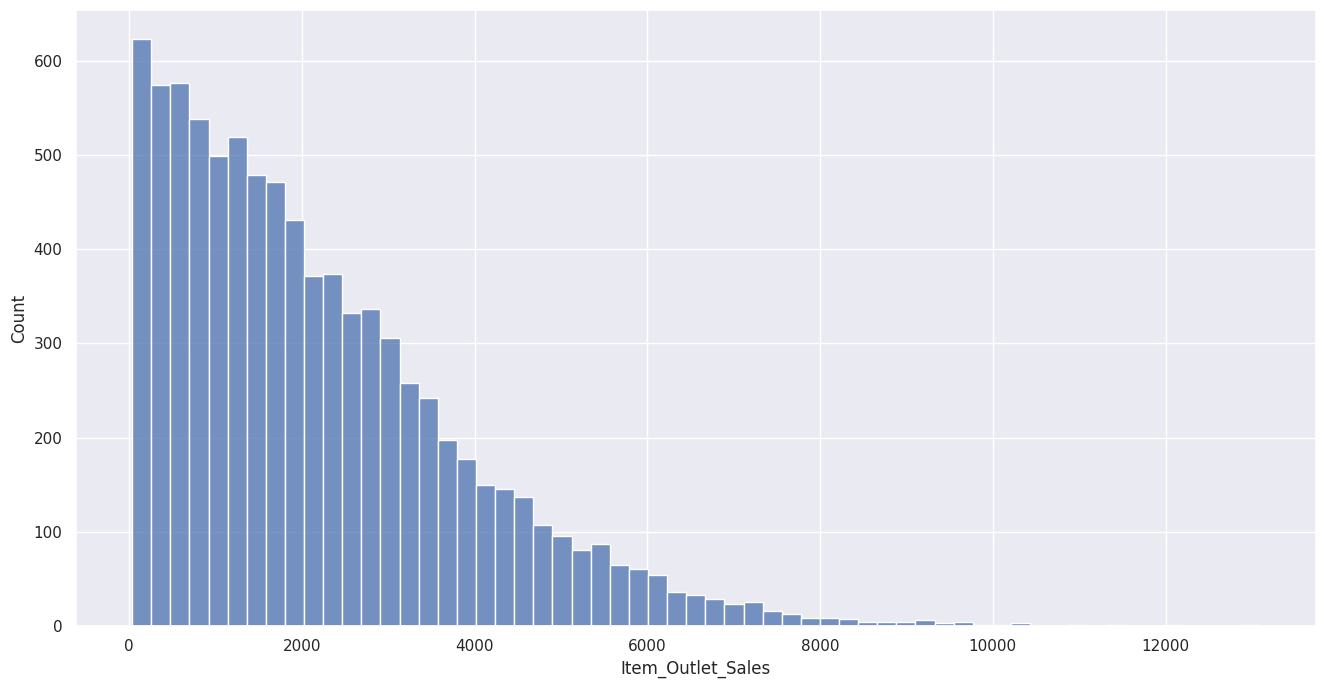

In [22]:
# checking target attribute distribution. Since it is right skewed we will have to normalise it
sns.set(rc={"figure.figsize":(16, 8)})
sns.histplot(data =proc_df, x ='Item_Outlet_Sales')

In [23]:
#Item_Weight                  float64
#Item_Fat_Content              object
#Item_Visibility              float64
#Item_Type                     object
#Item_MRP                     float64
#Outlet_Identifier             object
#Outlet_Establishment_Year      int64
#Outlet_Size                   object
#Outlet_Location_Type          object
#Outlet_Type                   object
#Item_Outlet_Sales            float64
#Ord_Item_Fat_Content           int64
#Ord_Outlet_Size              float64
#Ord_Outlet_Location_Type       int64
#Ord_Outlet_Type                int64
#Nom_Item_Type                  int64

In [24]:
get_stats(df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [25]:
target = 'Item_Outlet_Sales'

In [26]:
# function for bar plot
def bar_plots(data_frame, columns):
  ax = sns.barplot(data=data_frame, x=columns, y = target)
  ax.tick_params(axis='x', rotation=90)

In [27]:
# function for scatter plot
def scatter_plots(data_frame, columns):
  ax = sns.scatterplot(data=data_frame, x=columns, y = target)
  ax.tick_params(axis='x', rotation=90)

In [28]:
# function for line plot
def line_plots(data_frame, columns):
  ax = sns.lineplot(data=data_frame, x=columns, y = target)
  ax.tick_params(axis='x', rotation=90)

In [29]:
#sns.histplot(df_copy[column])
 # plt.show()

In [30]:
# function for histplot
def hist_plot(data_frame, columns):
  ax = sns.histplot(data=data_frame, x=columns)
  ax.tick_params(axis='x', rotation=90)

In [31]:
# function for boxplot
def box_plot(data_frame, columns):
  ax = sns.boxplot(data=data_frame, x=columns)
  ax.tick_params(axis='x', rotation=90)

In [32]:
#for column in ['Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Nom_Item_Type', 'Ord_Item_Fat_Content']:
 # plots(df, column))

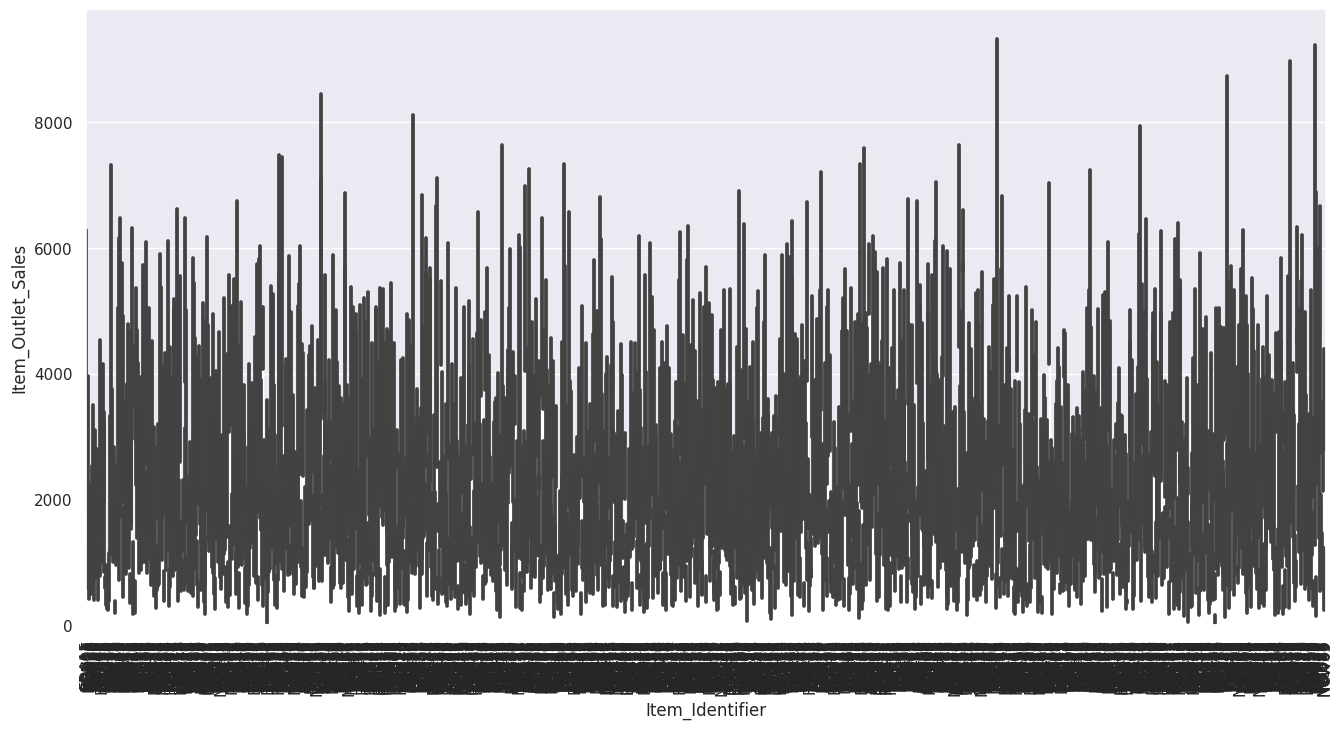

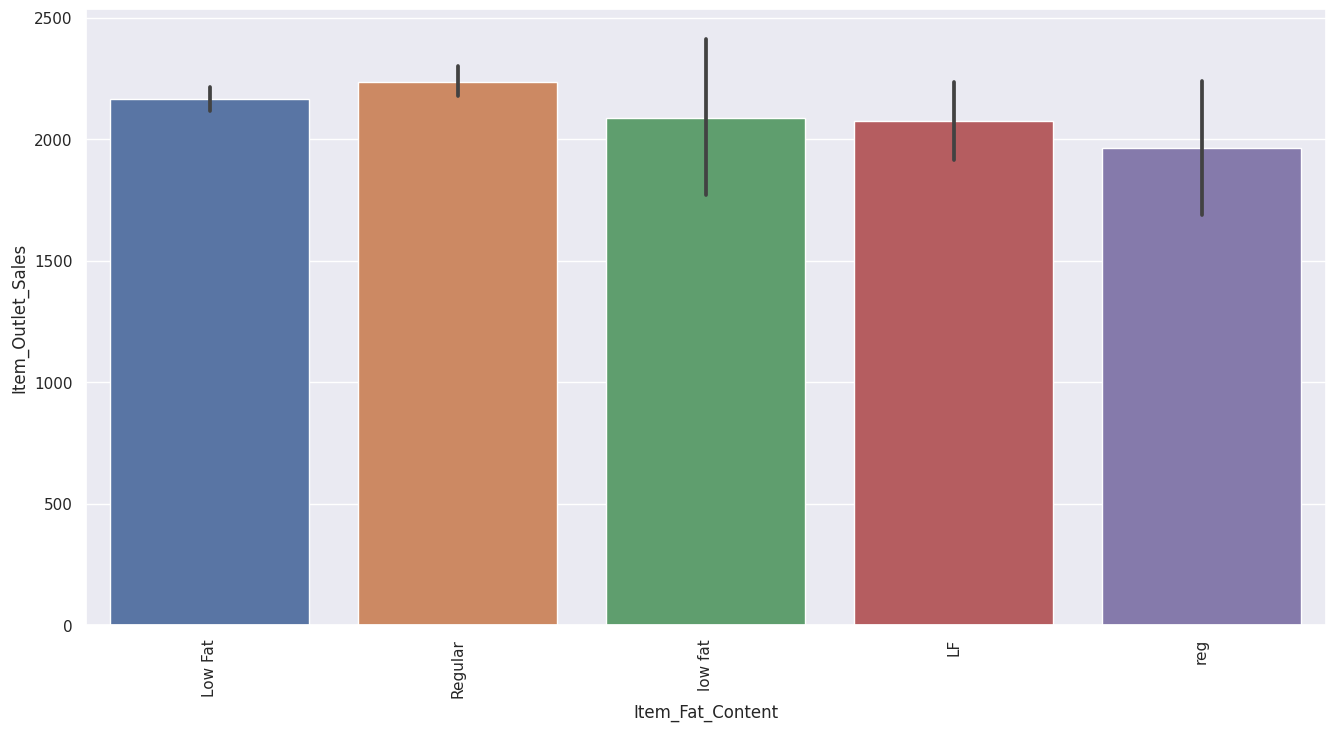

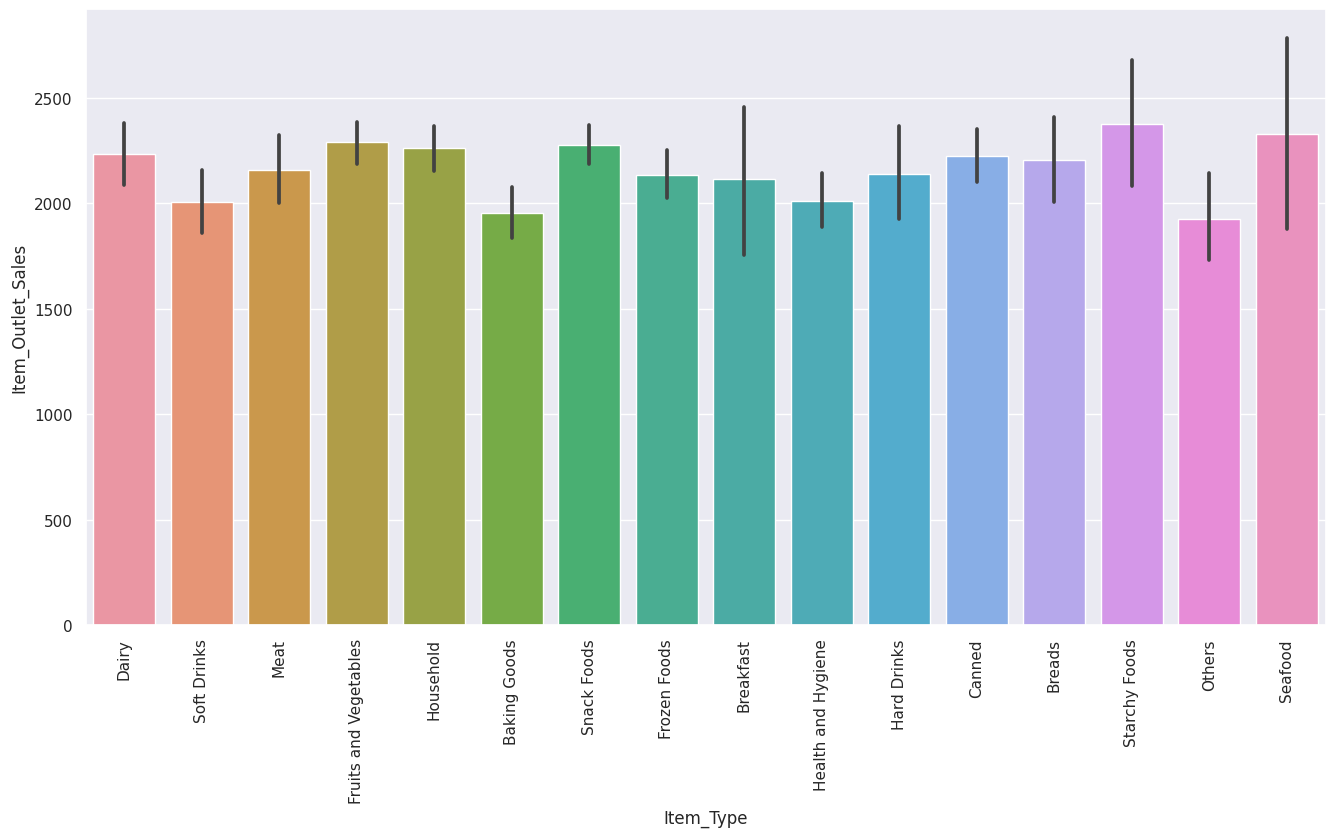

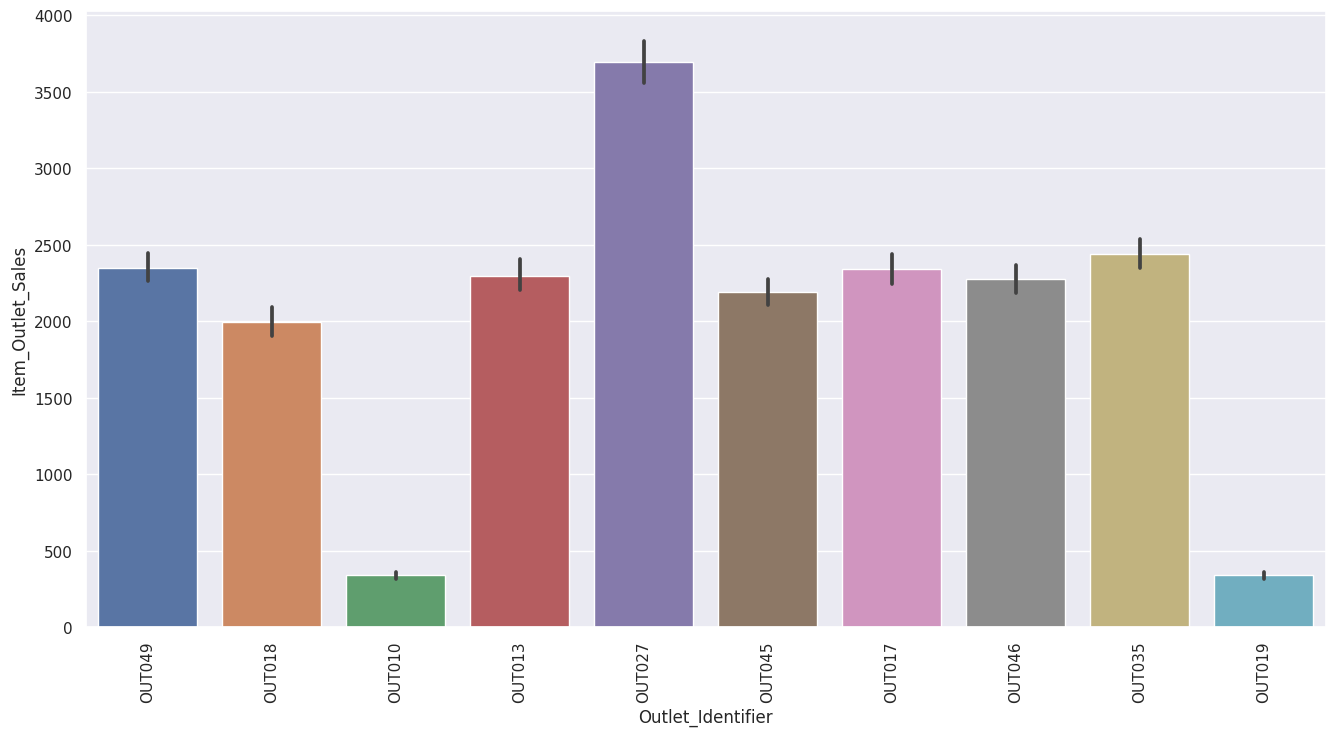

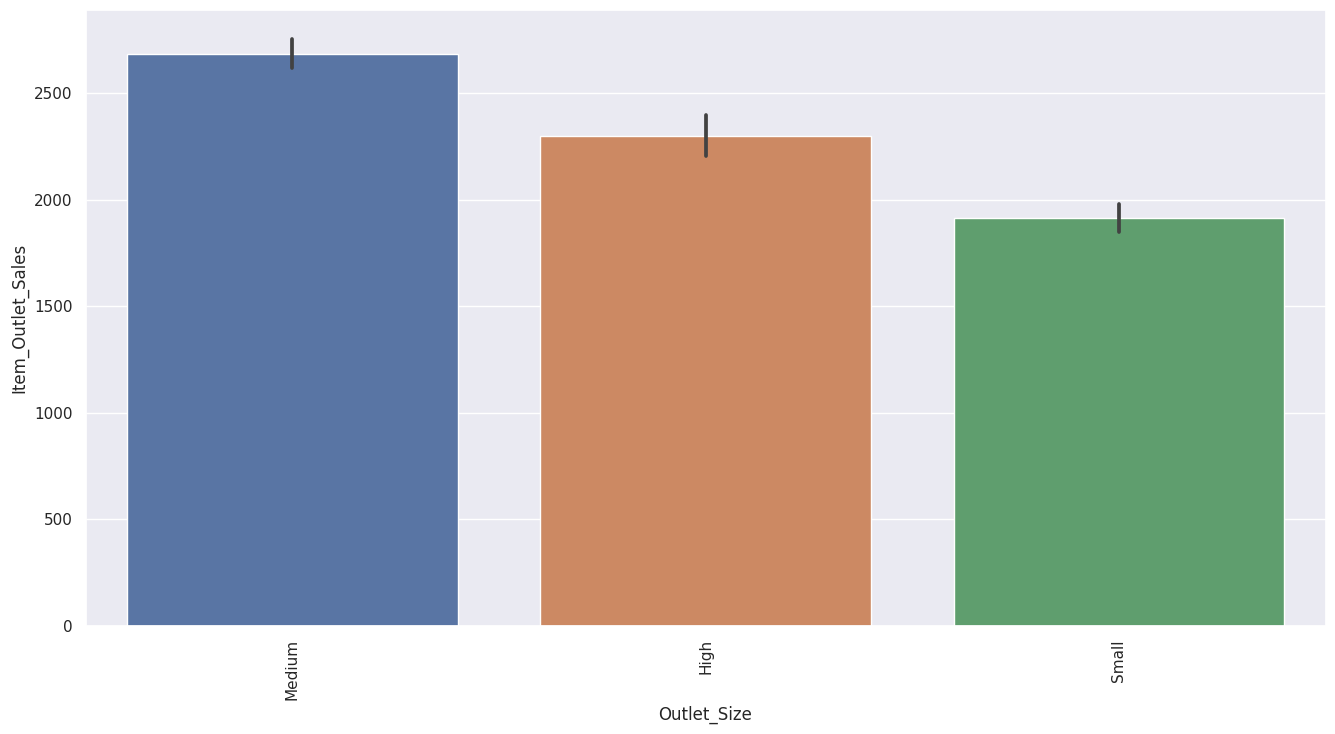

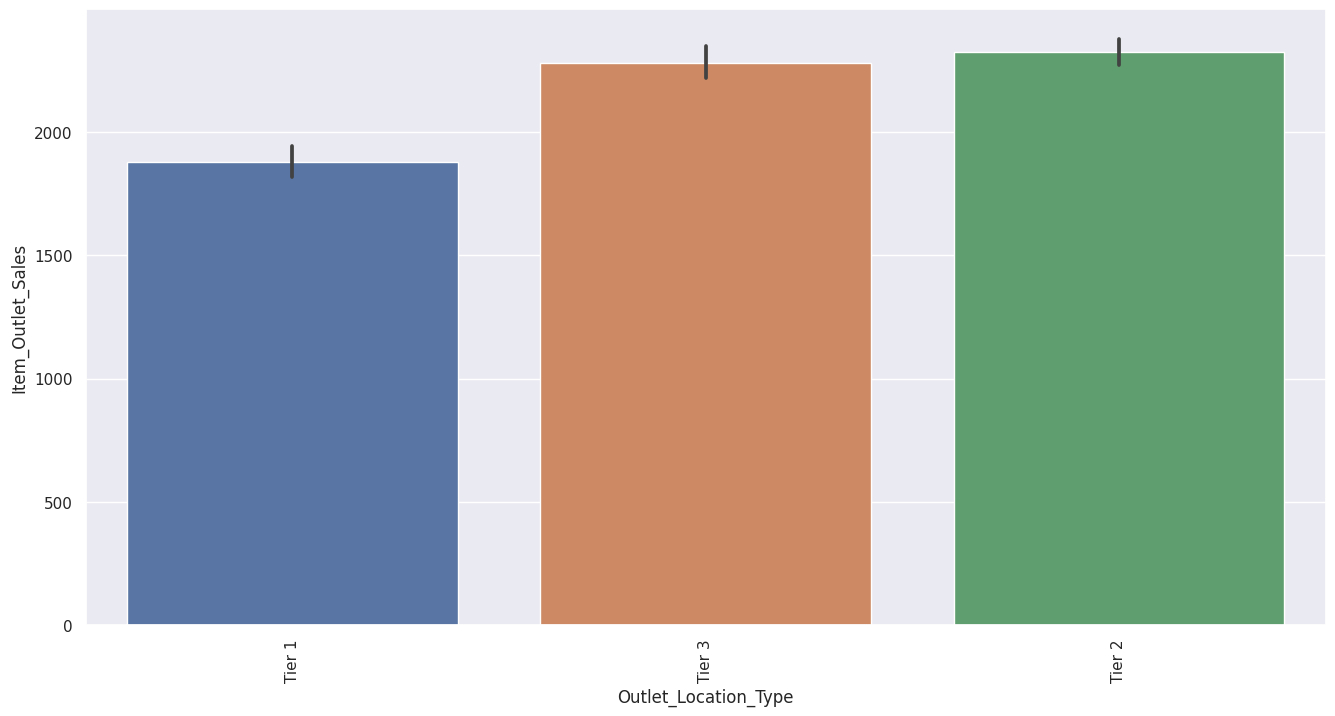

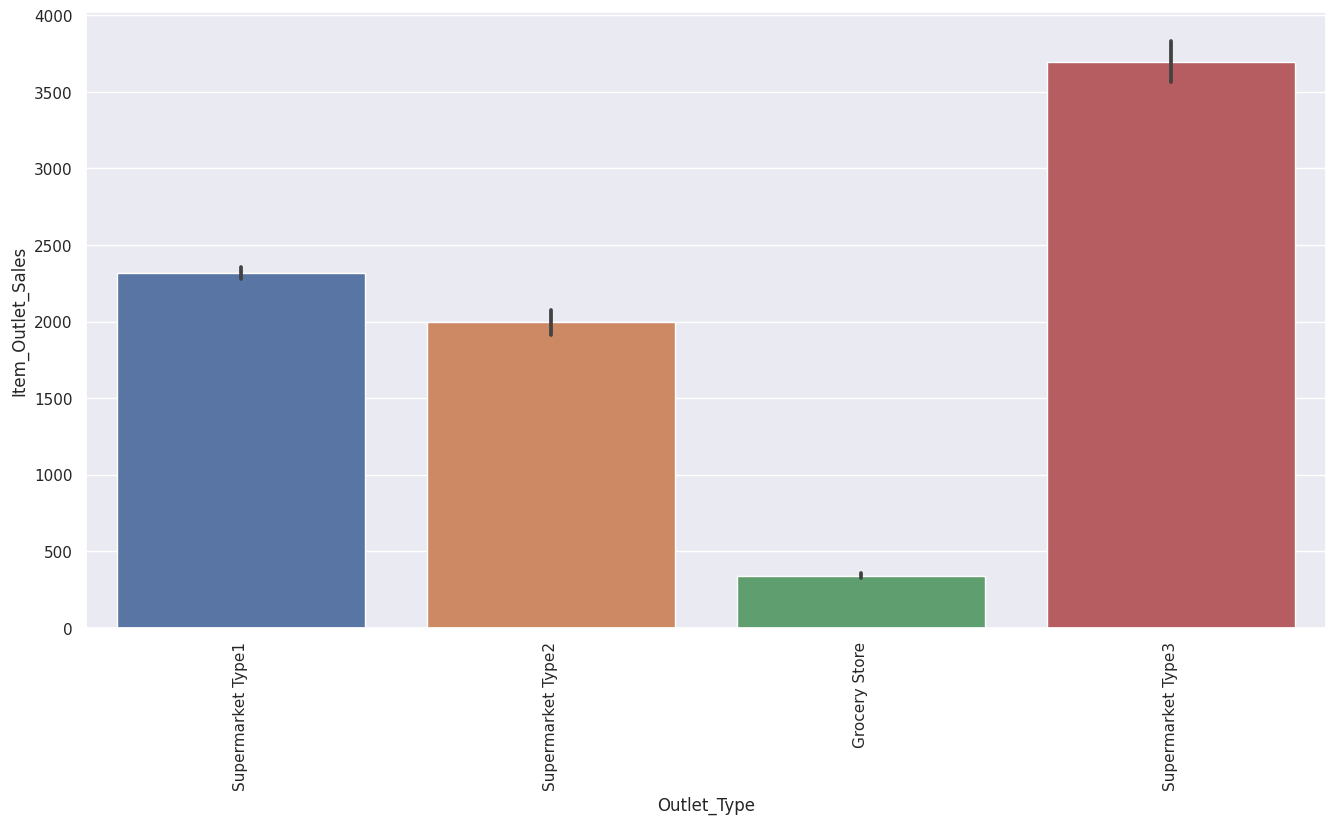

In [33]:
# Plotting bar plots for categorical columns with the target feature
for column in cat_columns:
  bar_plots(df, column)
  plt.show()

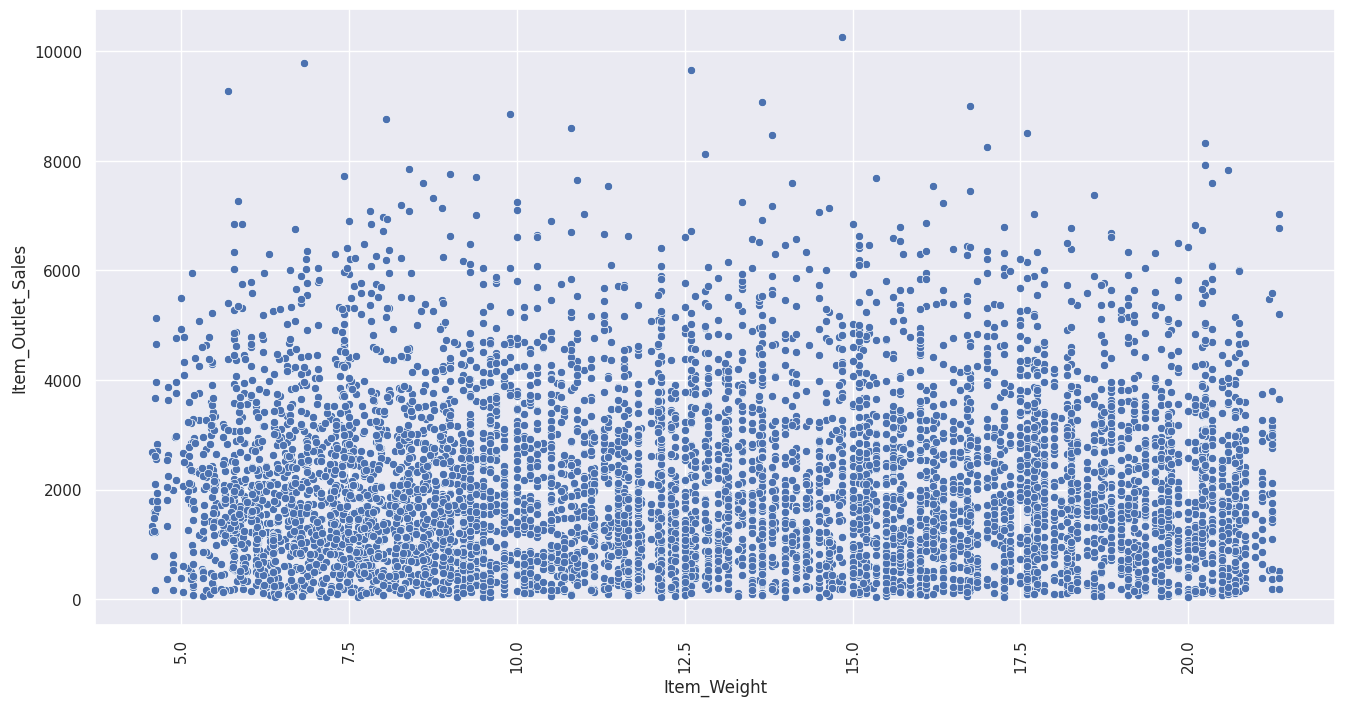

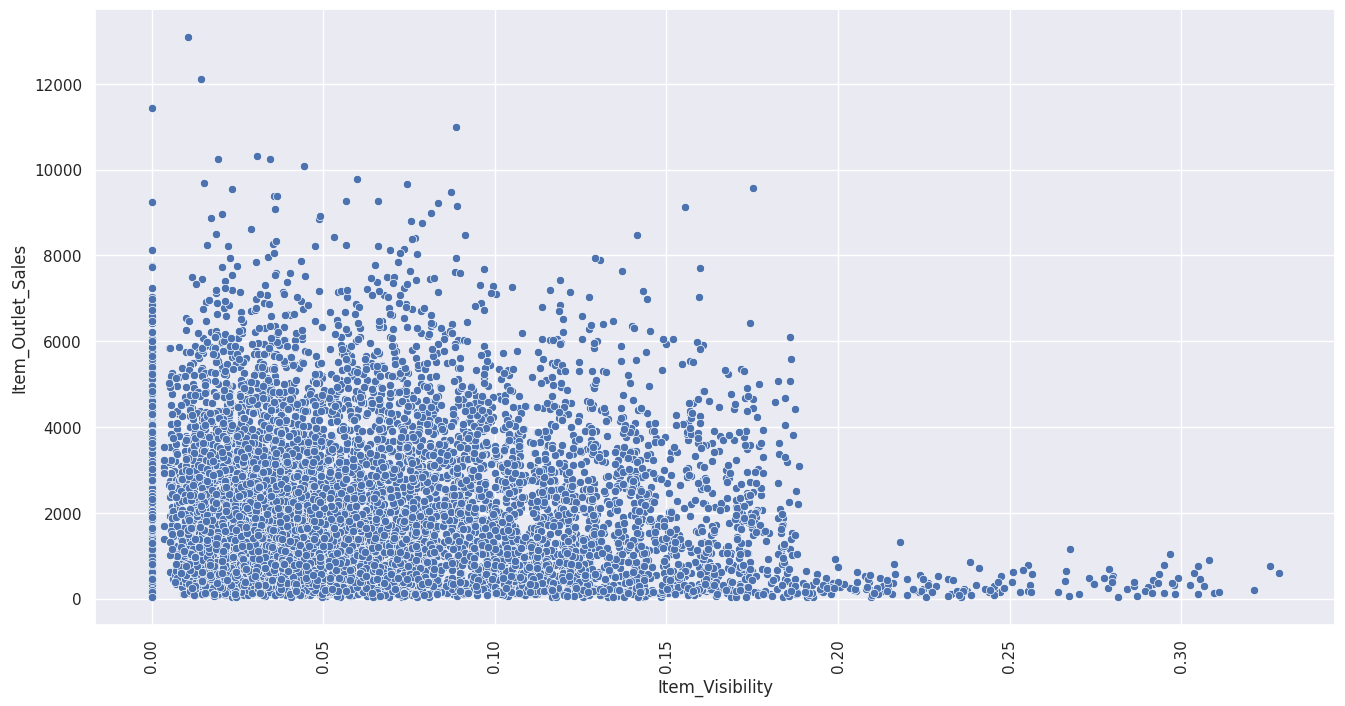

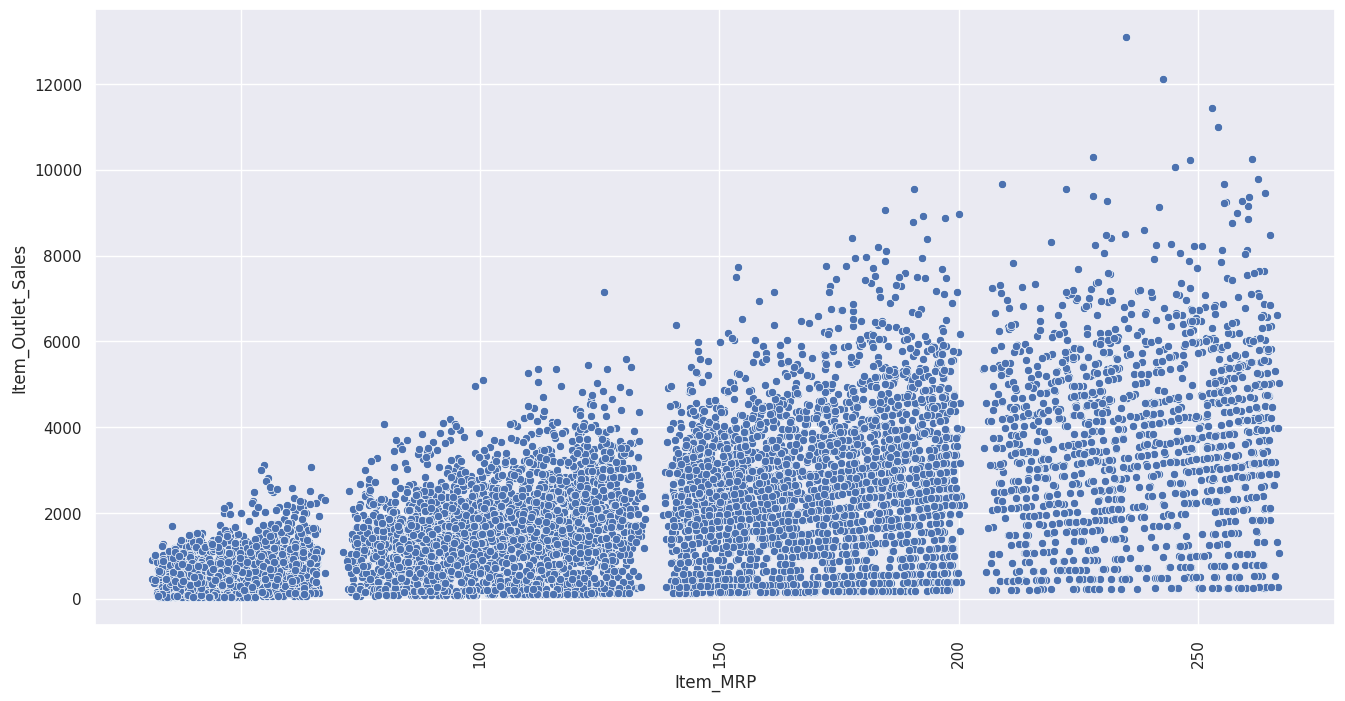

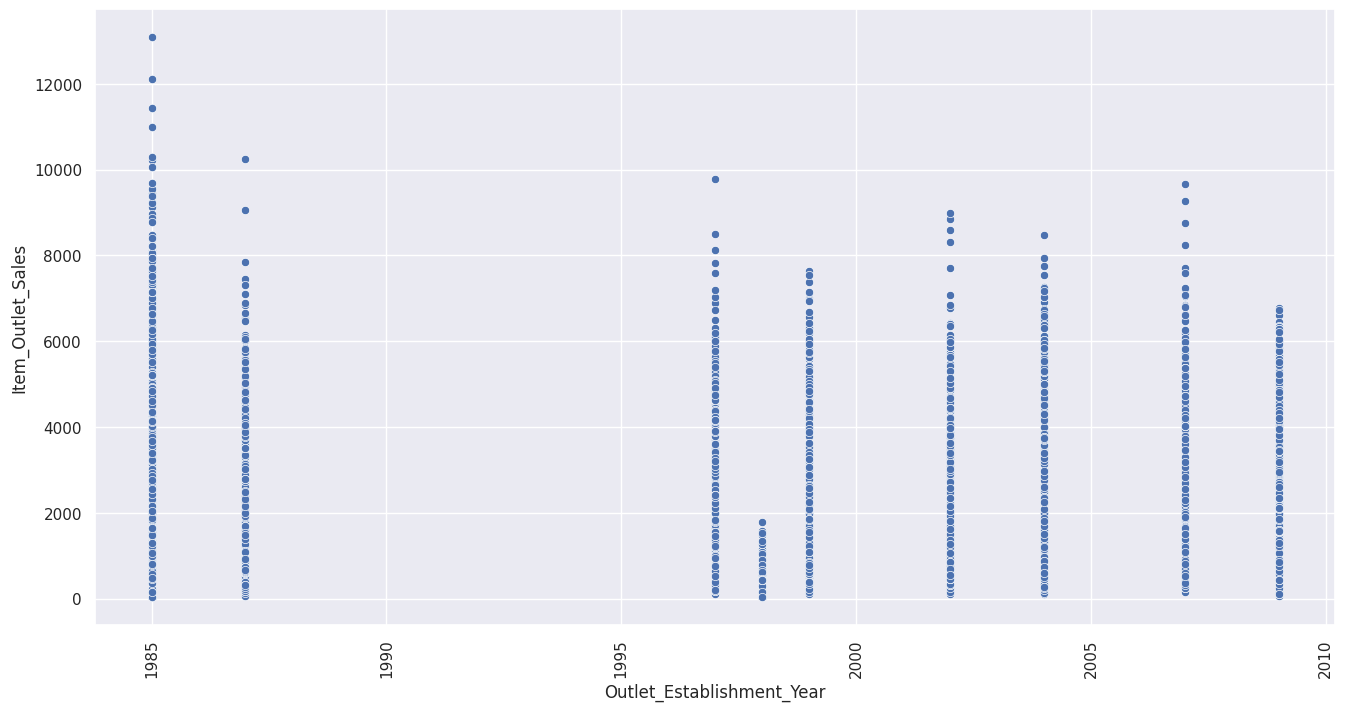

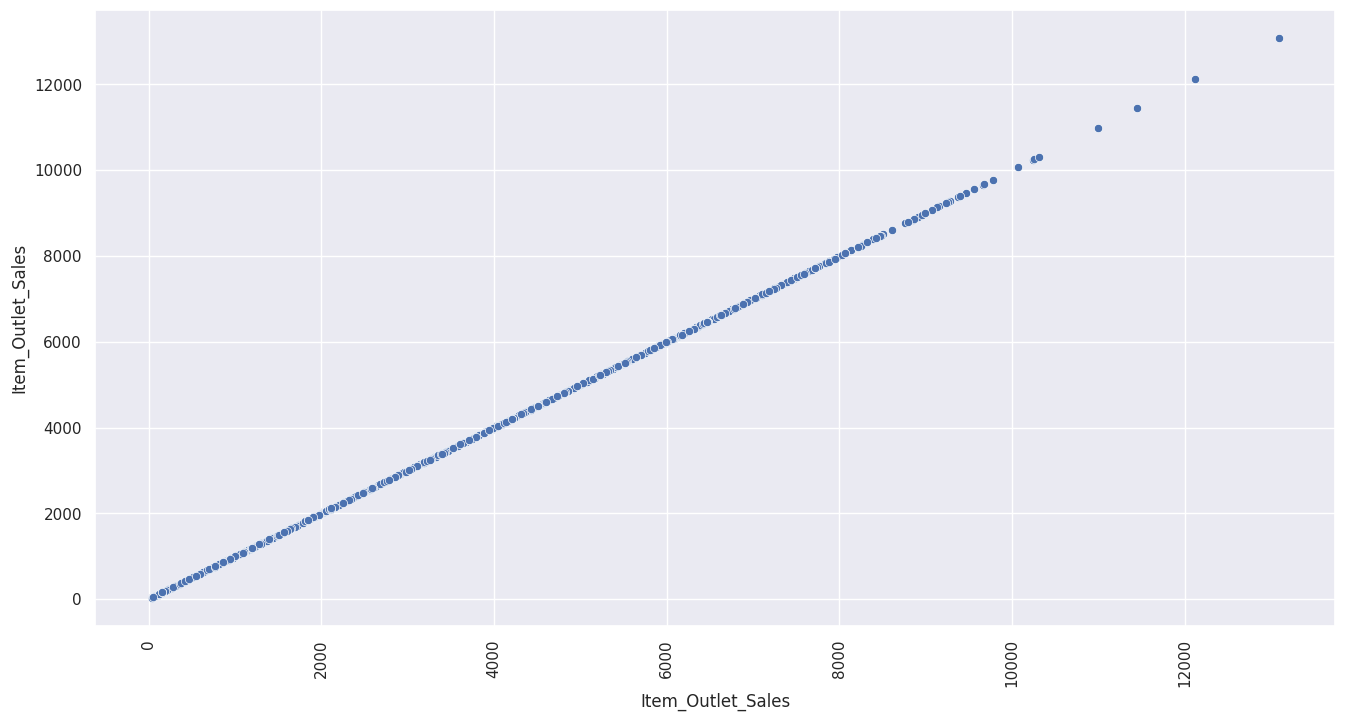

In [34]:
# Plotting scatter plots for numerical columns with the target feature
for column in num_cols:
  scatter_plots(df, column)
  plt.show()

In [35]:
# getting the correlation matrix on the dataset
corr =df.corr()

<ipython-input-35-d9fcf4dacffd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


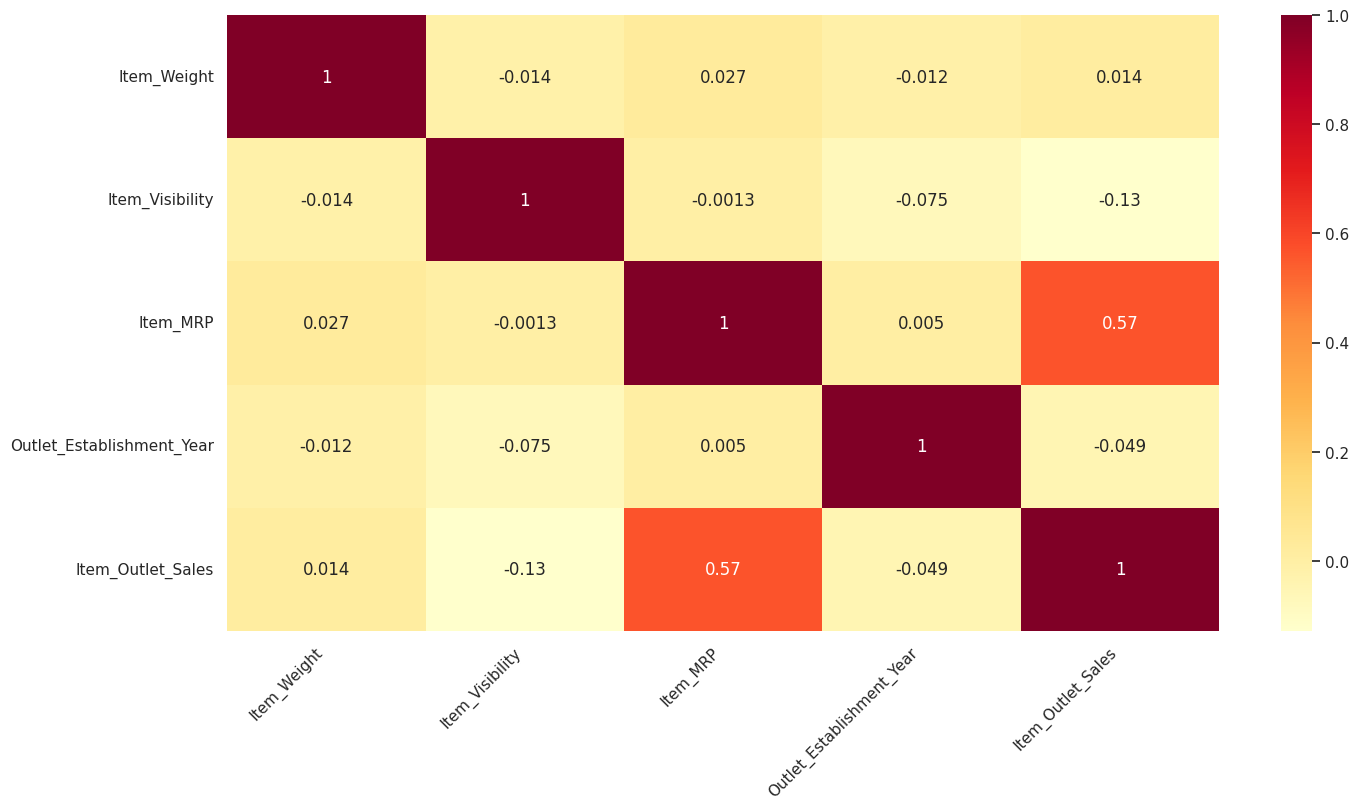

In [36]:
# heatmap for the correlation matrix
h_map = sns.heatmap(corr, cmap="YlOrRd", annot=True)
h_map.set_xticklabels(
    h_map.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# **Feature Engineering**

1. Impute missing values

In [37]:
get_nulls(df)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [38]:
fill_nulls(df, ['Item_Weight', 'Outlet_Size'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [39]:
get_nulls(df)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [40]:
# get data frame nulls for training data
get_nulls(proc_df)

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [41]:
# impute missing values of training data
fill_nulls(proc_df, ['Item_Weight'])


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [42]:
# check nulls again
get_nulls(proc_df)

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [43]:
# create an ordinal dictionary for each column to be converted
dict_Item_Fat_Content ={'Low Fat': 1,'LF': 1, 'low fat': 1, 'Regular': 2, 'reg':2}
dict_Outlet_Size = {'Small':1, 'Medium':2, 'High': 3}
dict_Outlet_Location_Type ={'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
dict_Outlet_Type={'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3': 3, 'Grocery Store': 4}
dict_Item_Type={'Dairy': 1, 'Soft Drinks':2, 'Meat':3,
                                                   'Fruits and Vegetables': 4, 'Household':5,
                                                   'Baking Goods':6,'Snack Foods': 7,
                                                   'Frozen Foods': 8,'Breakfast':9,
                                                   'Health and Hygiene':10,'Hard Drinks': 11,
                                                   'Canned': 12,'Breads': 13,'Starchy Foods': 14,
                                                   'Others': 15,'Seafood': 16}
# create new column and map the dictionary
df["Ord_Item_Fat_Content"] = df['Item_Fat_Content'].map(dict_Item_Fat_Content)
df['Ord_Outlet_Size'] = df['Outlet_Size'].map(dict_Outlet_Size)
df['Ord_Outlet_Location_Type'] = df['Outlet_Location_Type'].map(dict_Outlet_Location_Type)
df['Ord_Outlet_Type'] = df['Outlet_Type'].map(dict_Outlet_Type)
df['Nom_Item_Type'] = df['Item_Type'].map(dict_Item_Type)

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Ord_Item_Fat_Content,Ord_Outlet_Size,Ord_Outlet_Location_Type,Ord_Outlet_Type,Nom_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,2,1,1,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2,2,3,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,2,1,1,3
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2,2,3,4,4
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,3,3,1,5


In [45]:
df_copy = drop_cols(df, cat_columns)

##  Find and handle Outliers

##  Log transformation

##  Feature Scaling

In [46]:
cat_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [47]:
df_copy.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Ord_Item_Fat_Content           int64
Ord_Outlet_Size                int64
Ord_Outlet_Location_Type       int64
Ord_Outlet_Type                int64
Nom_Item_Type                  int64
dtype: object

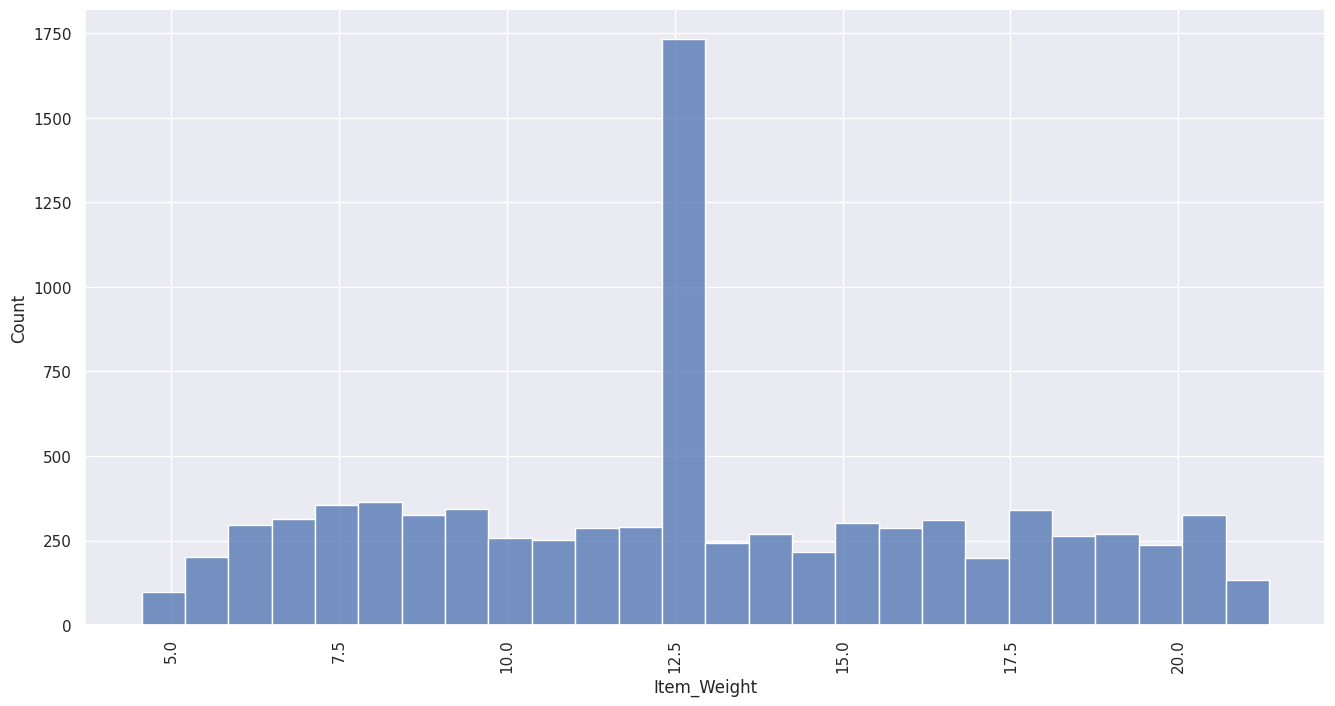

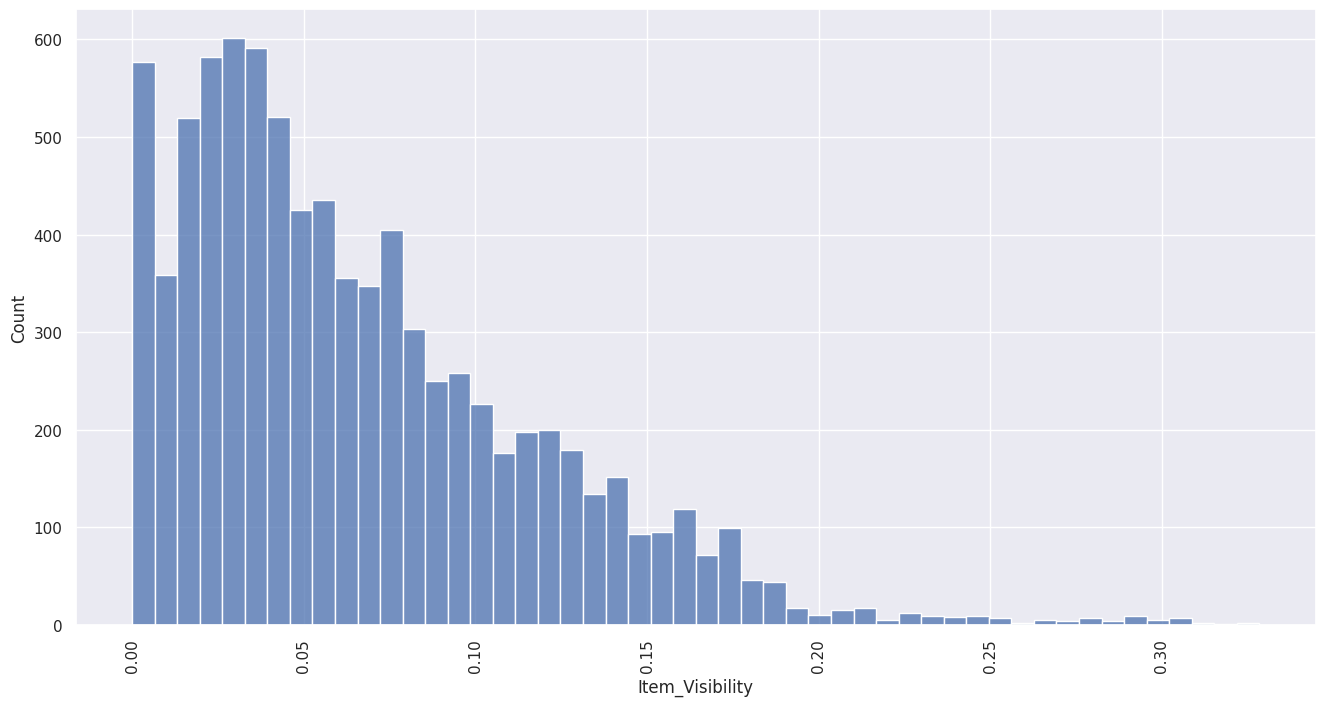

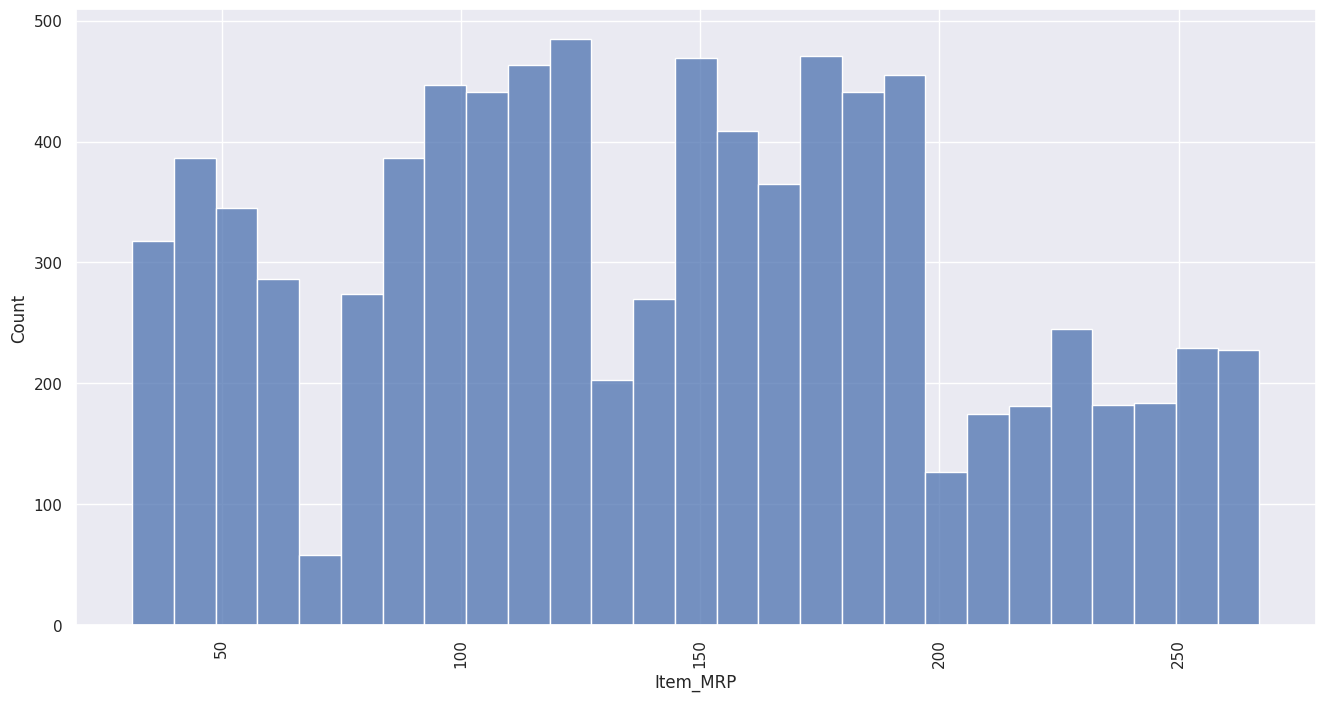

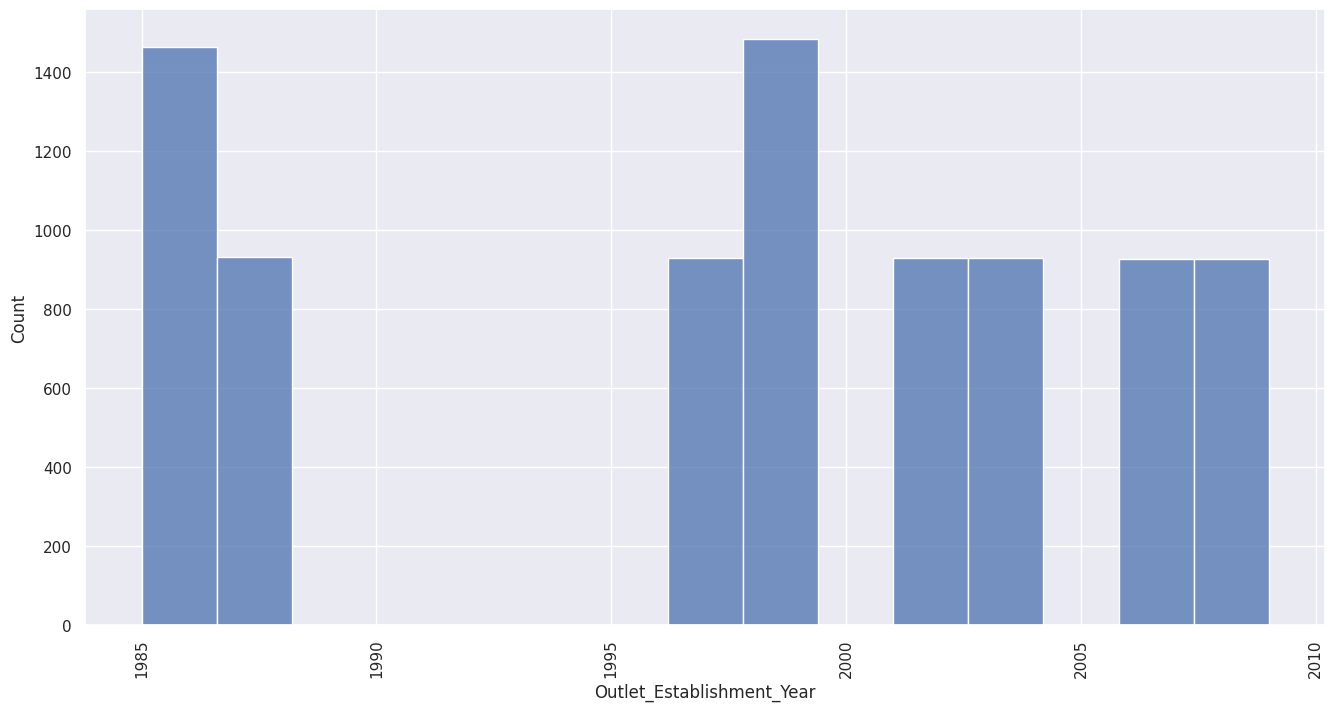

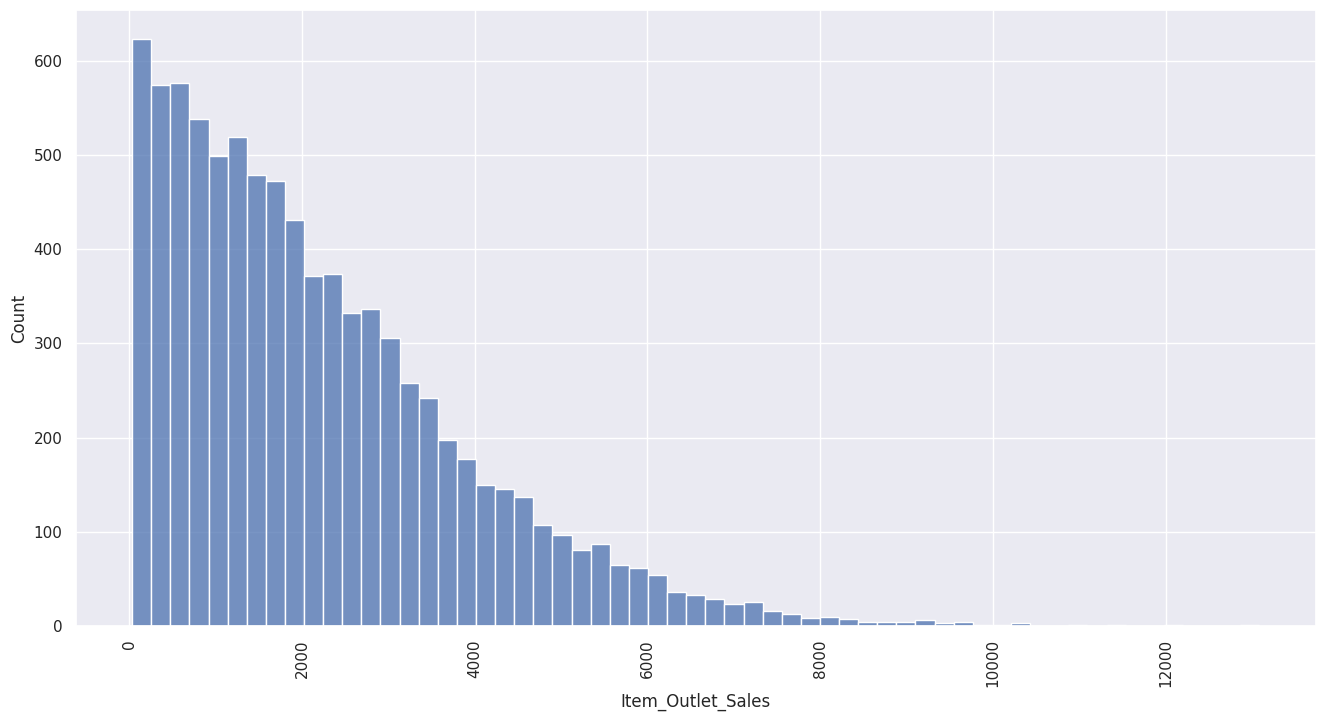

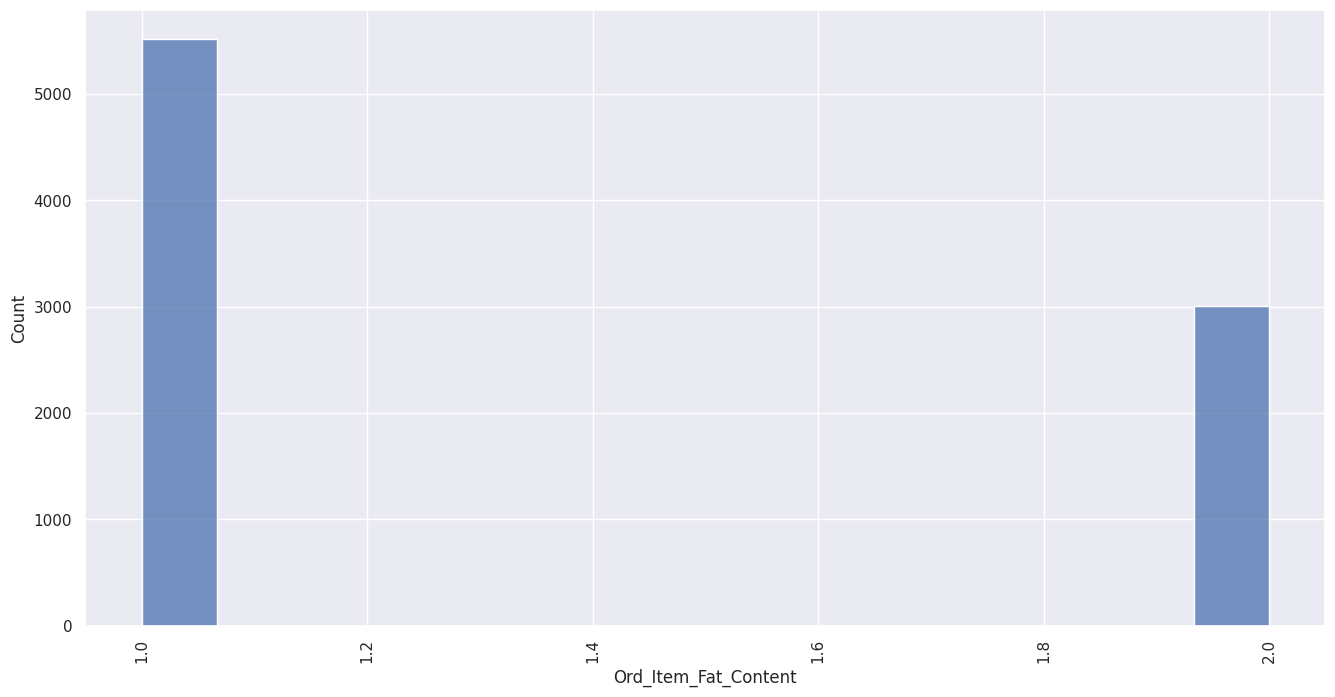

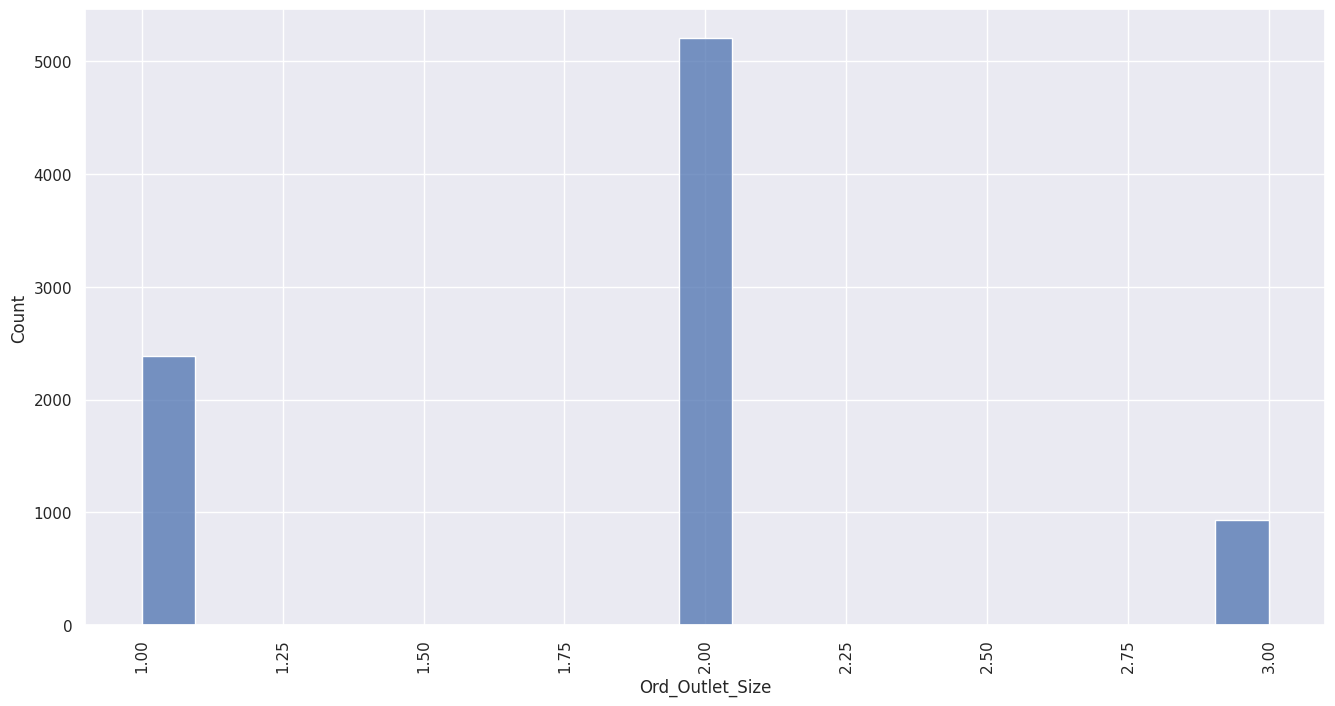

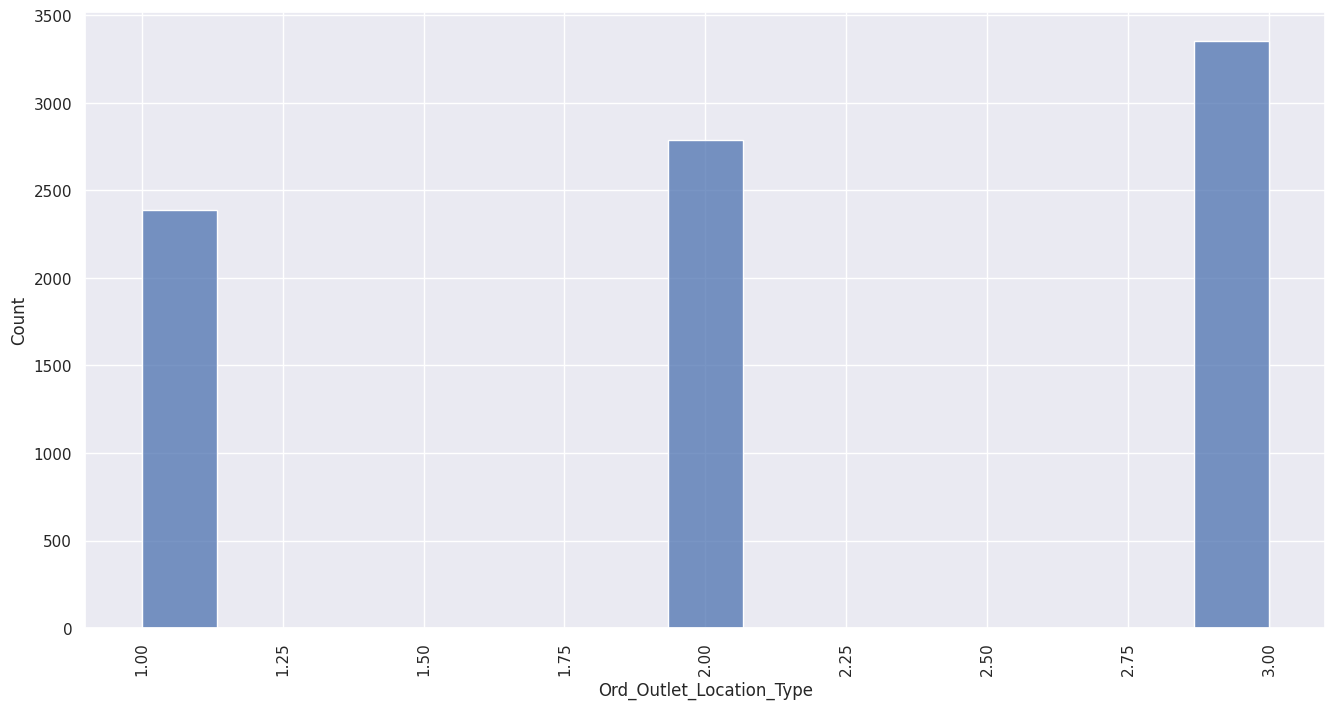

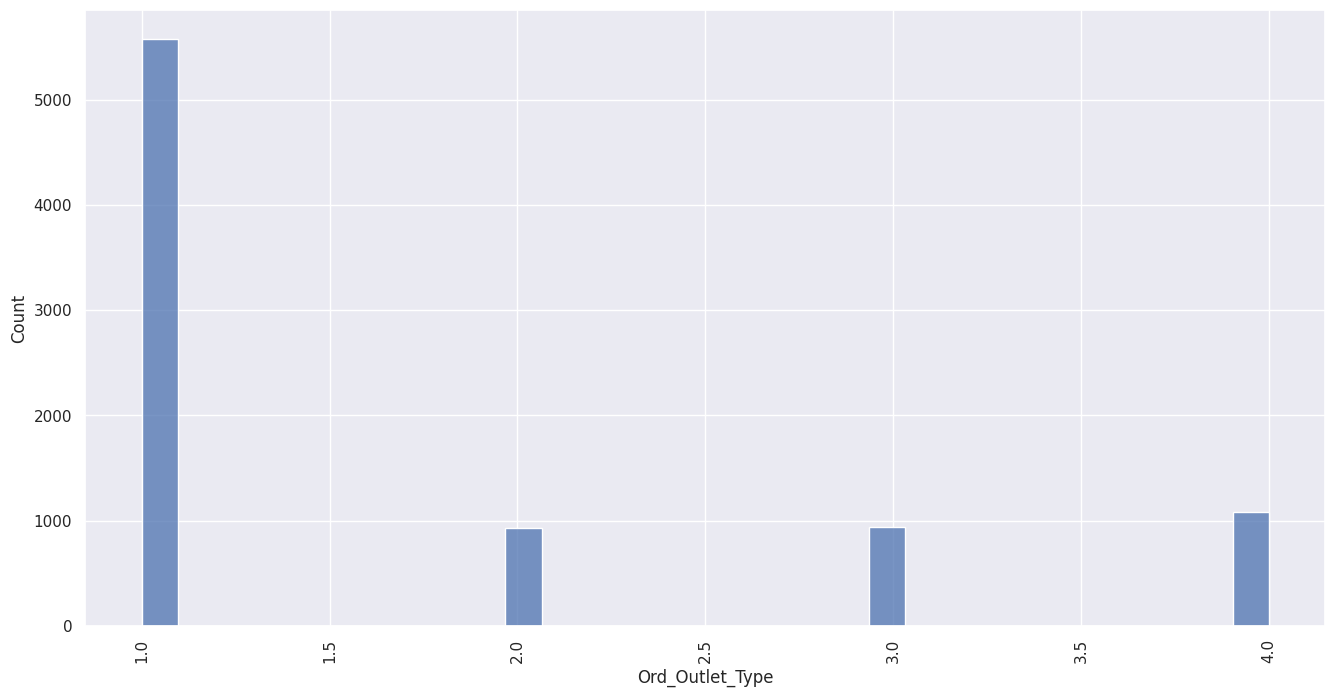

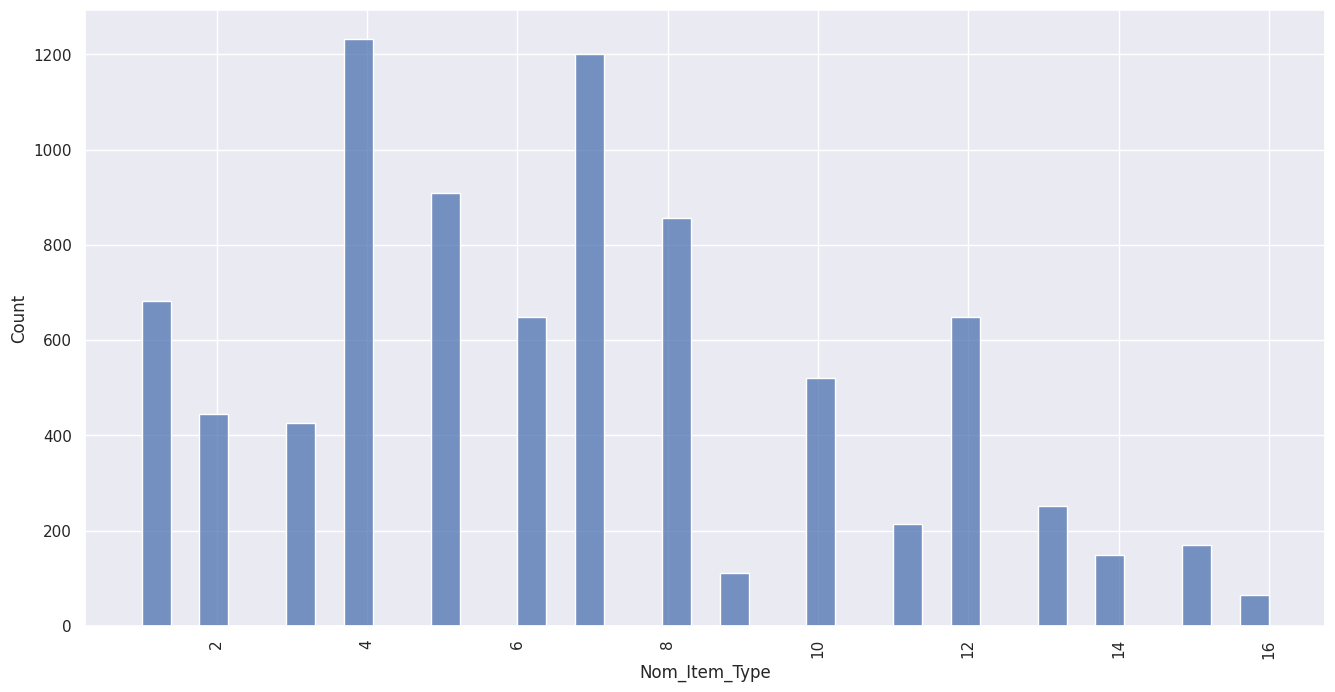

In [48]:
# Outlier finding
for column in df_copy.columns:
  hist_plot(df_copy, column)
  plt.show()


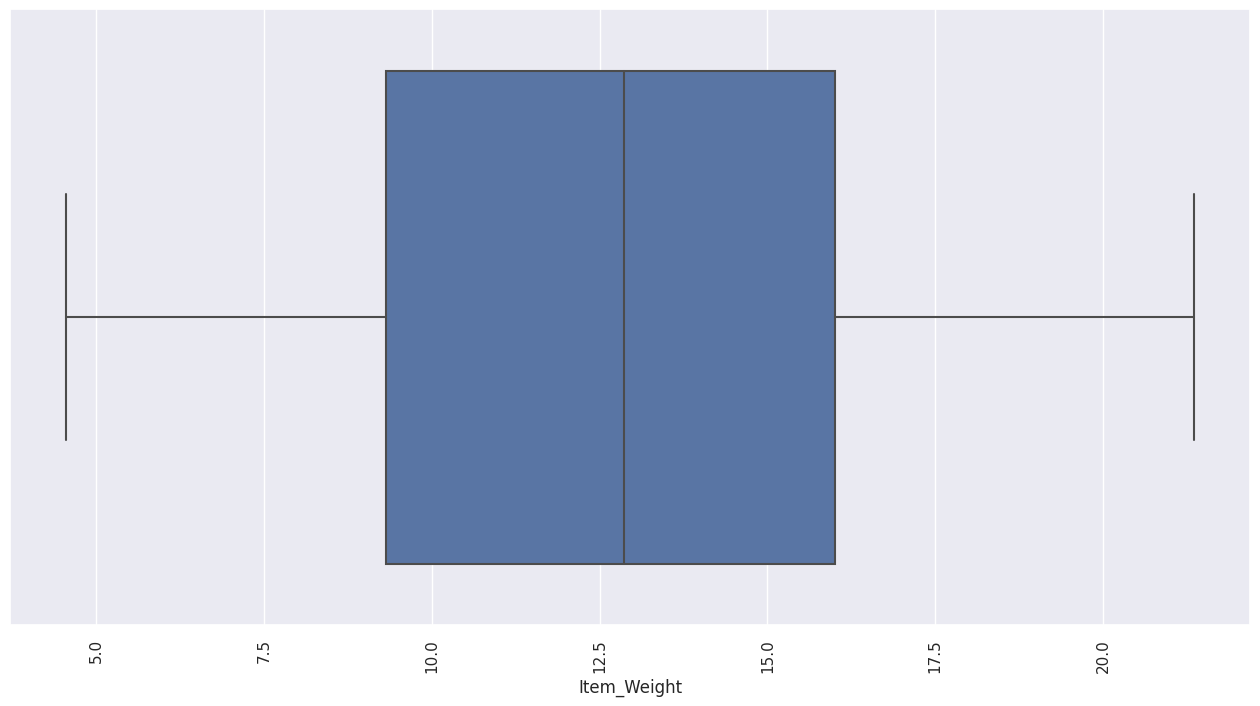

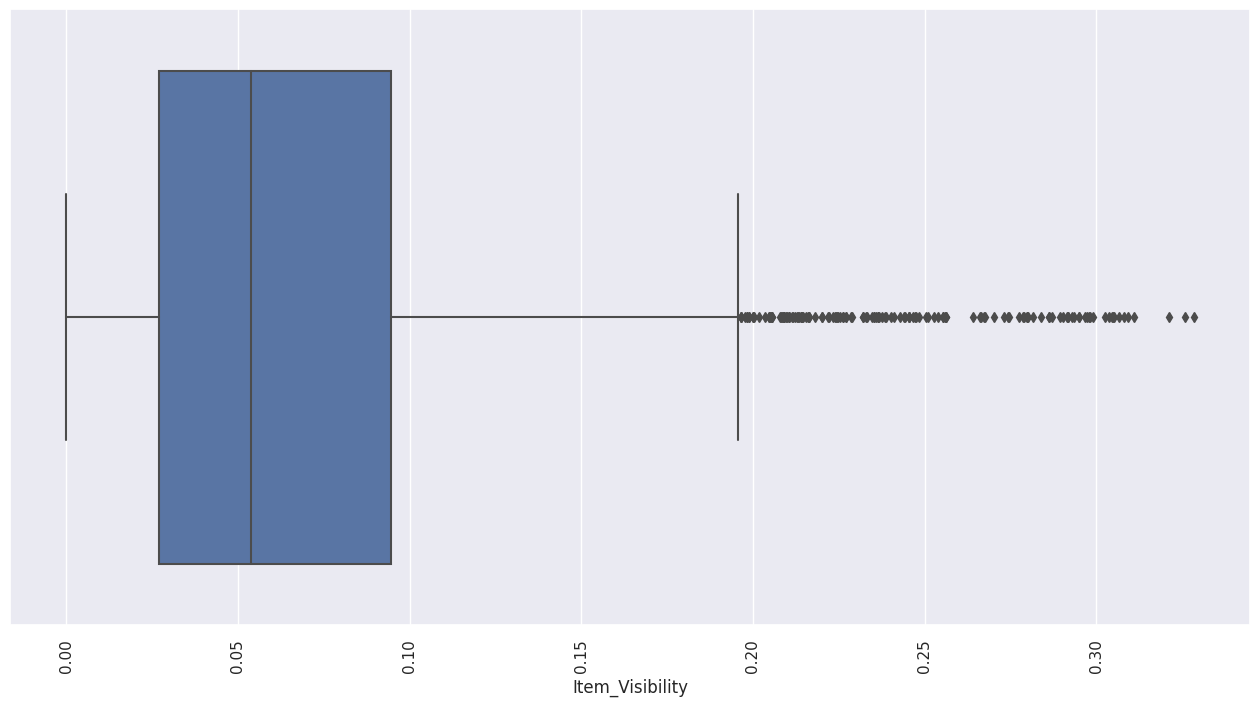

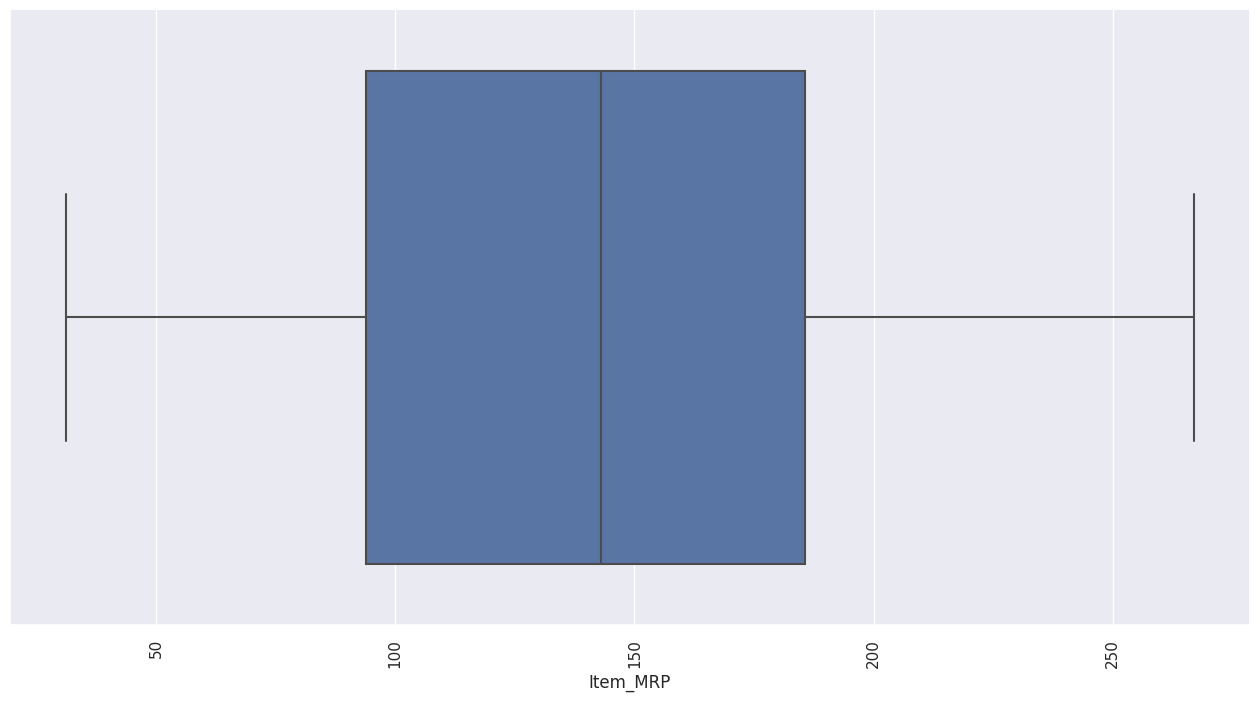

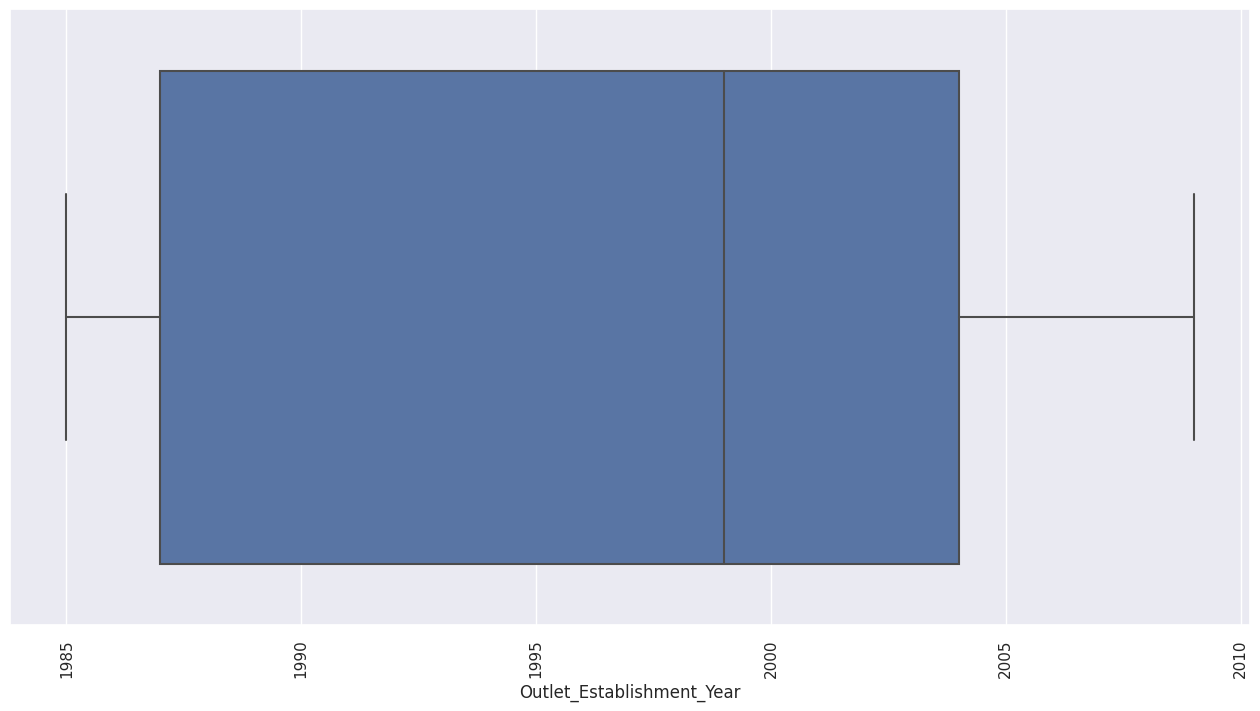

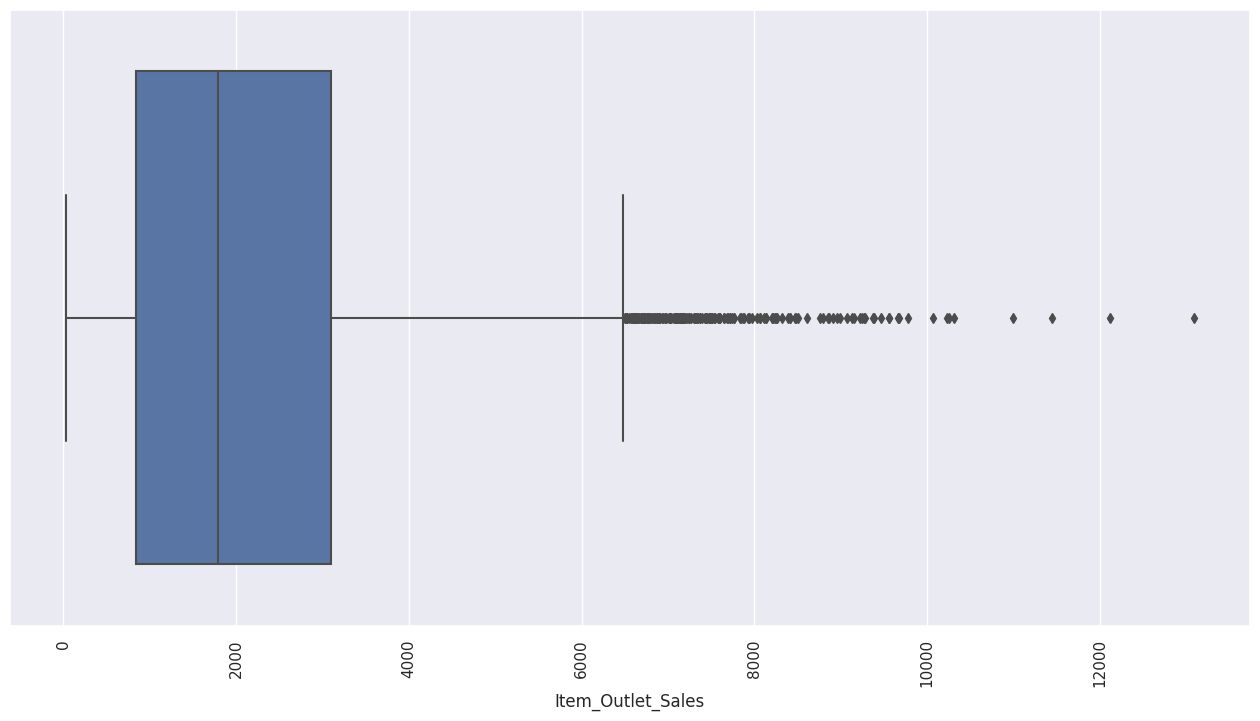

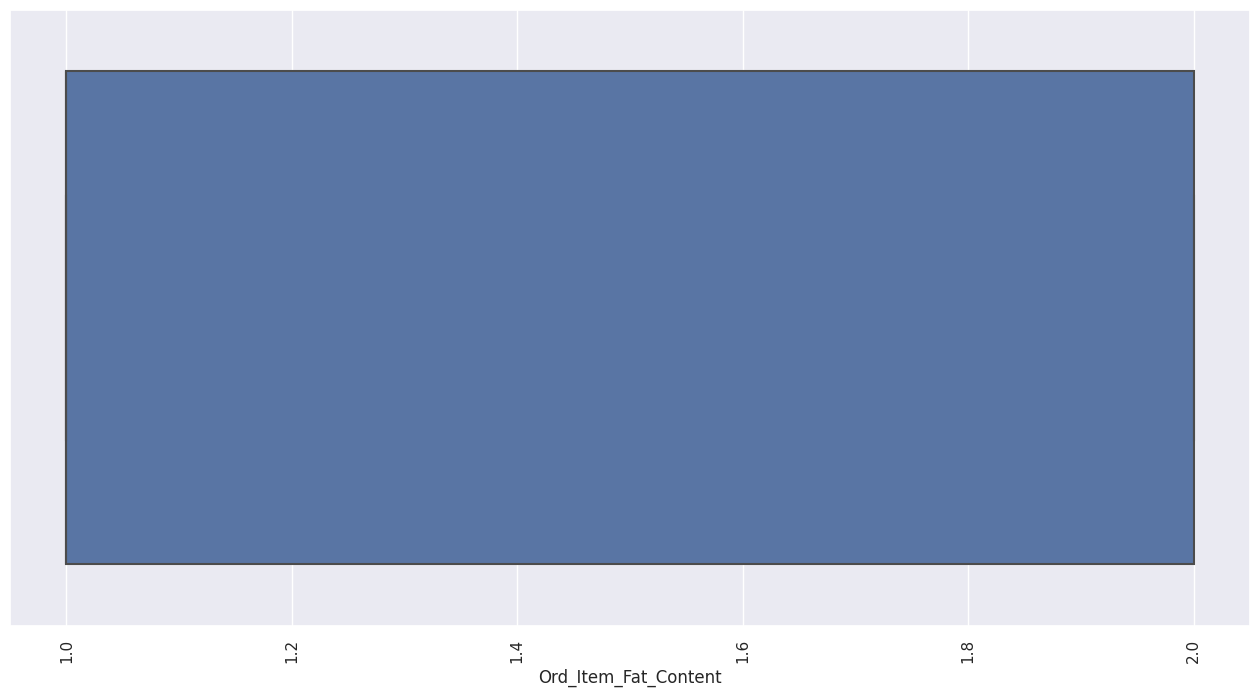

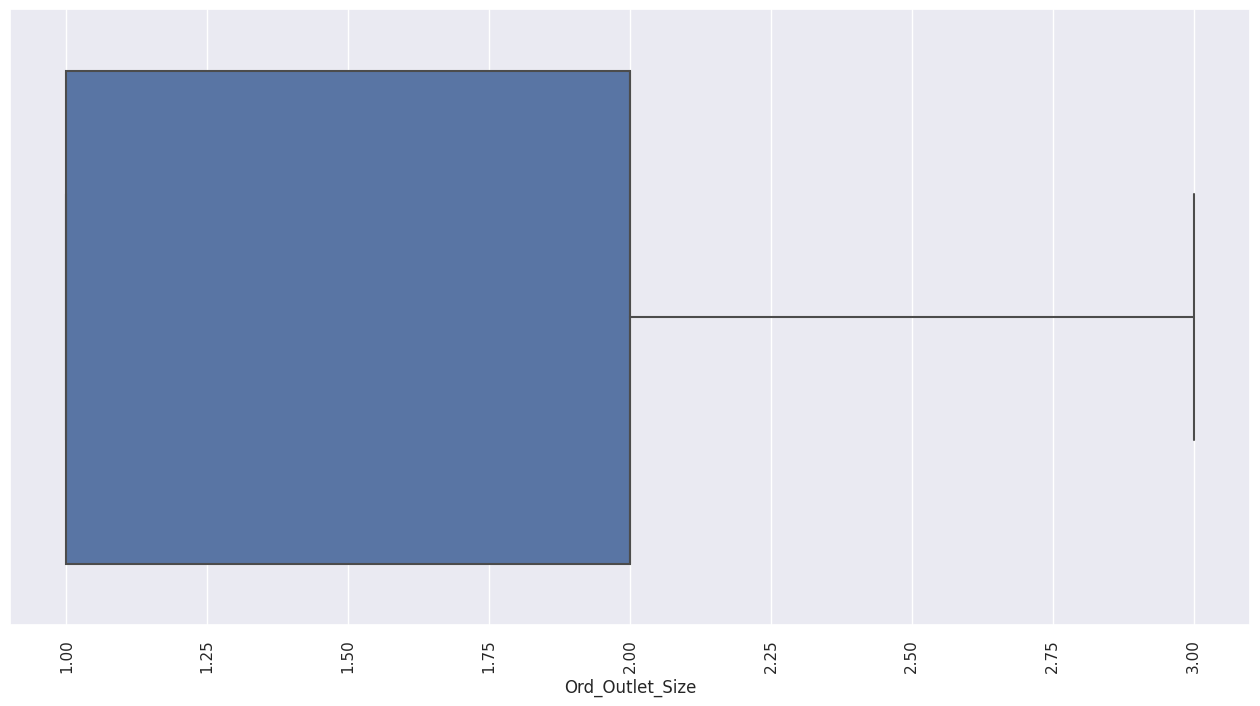

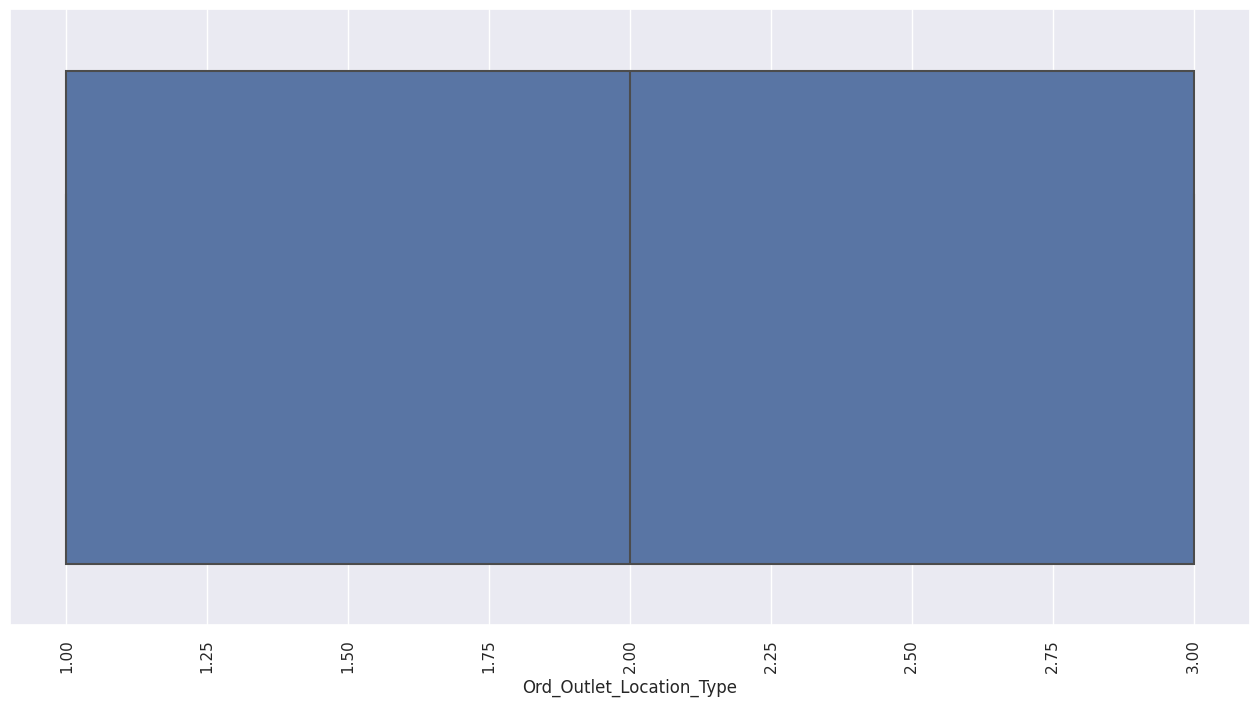

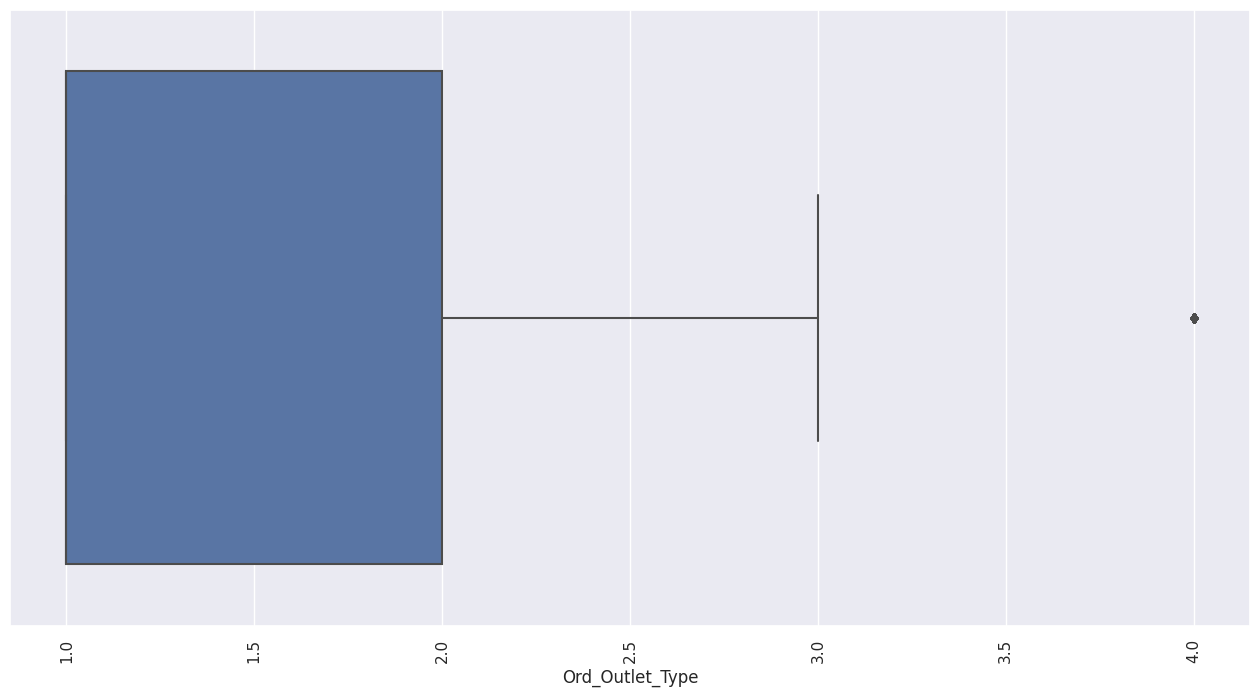

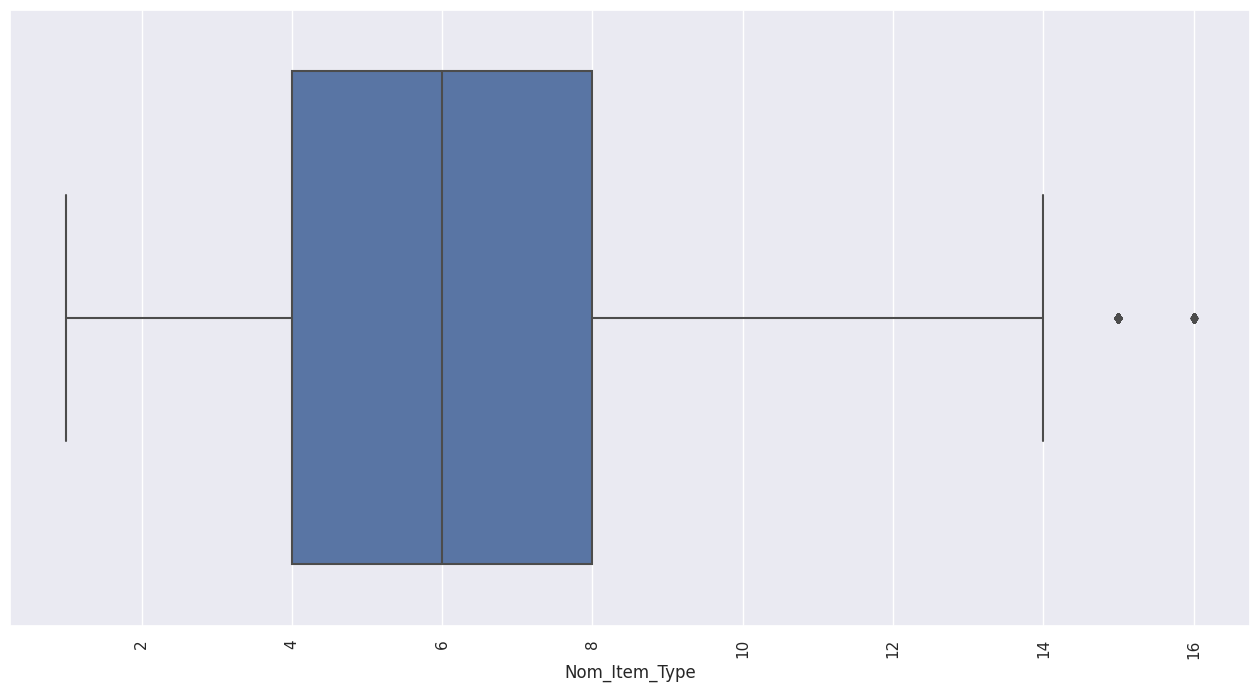

In [49]:
# Outlier finding
for column in df_copy.columns:
  box_plot(df_copy, column)
  plt.show()


Things to try in iteration 2
Outlier Handling

1. if skewed IQR Based Filtering
          Item Visibility, Item Outlet Sales
2. If normal distribution then Z-score treatment
3. For other distribution prcentile based approach
           Nom_Item_type

# Log Transformations


In [50]:
# Log Transformations

def log_transforms(data_frame, column):
  data_frame_log = np.log(data_frame[column]+1)
  return data_frame_log


In [51]:
# creating log transformed columns
for column in num_cols:
  df_copy[column + '_log'] = log_transforms(df_copy, column)

# Preparing data for modeling

In [52]:
# creating x and y for the models
y = df_copy['Item_Outlet_Sales']

cols_to_drop = ['Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year','Item_Weight','Item_Outlet_Sales', 'Item_Outlet_Sales_log']
x = df_copy.drop(cols_to_drop,  axis=1)

In [53]:
# splitting into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)

# **Model Building**

In [54]:
# creating a function to build the model
def model_evaluation (model_name,y_test,x_train,y_train,x_test):
  # creating a model instance
  model = model_name()
  # fitting the model with x_train and y_train
  model.fit(x_train, y_train)
  # predicting with the models
  preds = model.predict(x_test)
  preds_list =[]
  # collect predictions
  preds_list.append(preds)
  # collect rmse values
  rmse = sqrt(mean_squared_error(y_test, preds))
  return preds_list, rmse

In [55]:
# creating a list of models for the predictions
model_list=[LinearRegression,
            RandomForestRegressor,
            DecisionTreeRegressor,
            AdaBoostRegressor,
            KNeighborsRegressor,
             ExtraTreesRegressor,
            HistGradientBoostingRegressor,
            GradientBoostingRegressor,
            XGBRegressor]

In [56]:
preds_arr ={}
rmse_values =[]
for model in model_list:
  preds_arr[str(model)]=model_evaluation(model,y_test,x_train, y_train, x_test)[0]
  rmse_values.append(model_evaluation(model,y_test,x_train, y_train, x_test)[1])

In [57]:
# creating a list of string of the models for the dictionary
model_str_list=['Linear Regression', 'RandomForestRegressor', 'Decision TreeRegressor', 'AdaBoost Regressor',
            'KNeighborsRegressor','ExtraTreesRegressor', 'HistGradientBoostingRegressor', 'GradientBoostingRegressor','XGB']

In [58]:
# creating a dictionary with models and respective rmse values
rmse_dict = {}
for i in range(len(model_str_list)):
  rmse_dict[model_str_list[i]] = rmse_values[i]

In [59]:
# sorting the dictionary in ascending order of rmse values
dict(sorted(rmse_dict.items(), key=lambda item: item[1]))

{'GradientBoostingRegressor': 1061.352537345261,
 'HistGradientBoostingRegressor': 1080.3677137487784,
 'RandomForestRegressor': 1121.9208804002278,
 'ExtraTreesRegressor': 1144.306161114922,
 'XGB': 1163.332727374028,
 'KNeighborsRegressor': 1194.288956302885,
 'AdaBoost Regressor': 1241.8956469506481,
 'Linear Regression': 1283.60121899582,
 'Decision TreeRegressor': 1504.416306123972}

##### Deep Learning Model

In [60]:
x_test.shape

(2557, 9)

In [61]:
x.shape

(8523, 9)

In [62]:
input_neurons = x.shape[1]
output_neurons = x_test.shape[0]

In [63]:
number_of_hidden_layers = 6
neuron_hidden_layer_1 = 15
neuron_hidden_layer_2 = 10
neuron_hidden_layer_3 = 14
neuron_hidden_layer_4 = 13
neuron_hidden_layer_5 = 15
neuron_hidden_layer_6 = 5

In [64]:
# building deep learning model
model_dl = Sequential()
model_dl.add(InputLayer(input_shape=(input_neurons,)))
model_dl.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model_dl.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model_dl.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model_dl.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model_dl.add(Dense(units=neuron_hidden_layer_5, activation='relu'))
model_dl.add(Dense(units=neuron_hidden_layer_6, activation='relu'))
model_dl.add(Dense(units=output_neurons, activation='linear'))

In [65]:
model_dl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                150       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 14)                154       
                                                                 
 dense_3 (Dense)             (None, 13)                195       
                                                                 
 dense_4 (Dense)             (None, 15)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 80        
                                                                 
 dense_6 (Dense)             (None, 2557)              1

In [66]:
model_dl.compile(loss='mean_absolute_error',optimizer='Adam',metrics= [tf.keras.metrics.RootMeanSquaredError()])

In [67]:
model_history = model_dl.fit(x, y, epochs=100, validation_split = 0.2)

Epoch 1/100
214/214 [==============================] - 3s 4ms/step - loss: 1922.6643 - root_mean_squared_error: 2517.2317 - val_loss: 1333.7863 - val_root_mean_squared_error: 1807.6902
Epoch 2/100
214/214 [==============================] - 1s 4ms/step - loss: 1306.9714 - root_mean_squared_error: 1741.3954 - val_loss: 1313.9991 - val_root_mean_squared_error: 1773.9164
Epoch 3/100
214/214 [==============================] - 1s 5ms/step - loss: 1284.4325 - root_mean_squared_error: 1720.3156 - val_loss: 1284.3965 - val_root_mean_squared_error: 1741.6508
Epoch 4/100
214/214 [==============================] - 1s 5ms/step - loss: 1248.3076 - root_mean_squared_error: 1686.9336 - val_loss: 1238.0746 - val_root_mean_squared_error: 1743.6788
Epoch 5/100
214/214 [==============================] - 1s 5ms/step - loss: 1183.5602 - root_mean_squared_error: 1655.1189 - val_loss: 1143.8097 - val_root_mean_squared_error: 1664.2684
Epoch 6/100
214/214 [==============================] - 1s 5ms/step - loss: 

In [68]:
prediction_x = model_dl.predict(x_test)
classes_x = np.argmax(prediction_x, axis = 1)

80/80 [==============================] - 0s 2ms/step


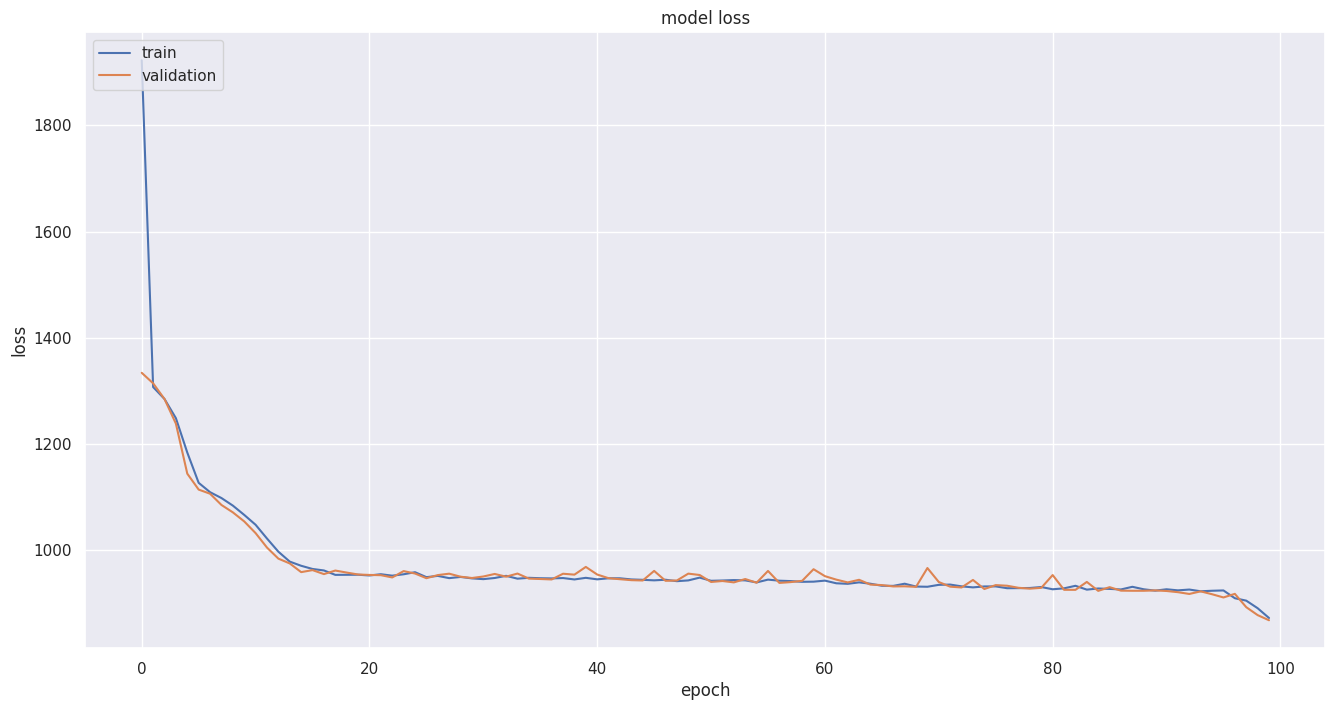

In [69]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

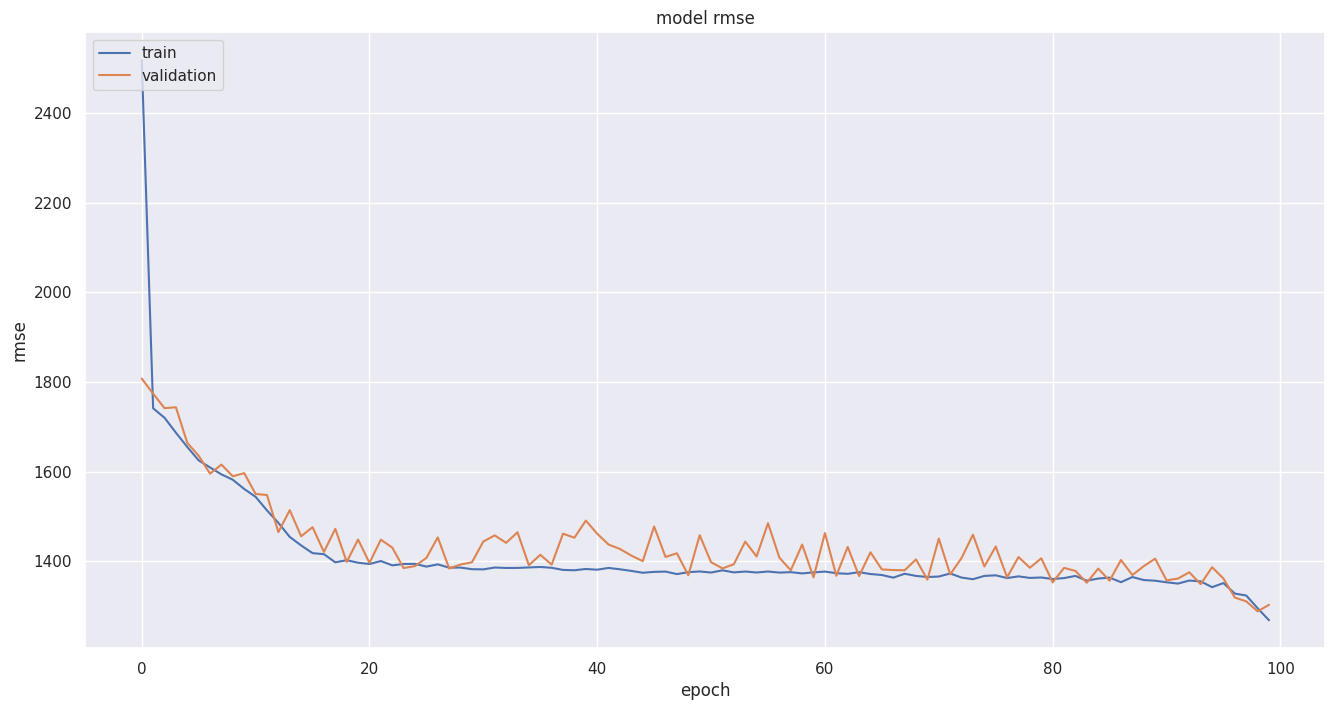

In [70]:
# summarize history for accuracy
plt.plot(model_history.history['root_mean_squared_error'])
plt.plot(model_history.history['val_root_mean_squared_error'])
plt.title('model rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
# rmse for deep learning model
rmse_dl = sqrt(mean_squared_error(y_test, classes_x))

In [72]:
# accuracy on validation set
print('RMSE on test set:',rmse_dl)

RMSE on test set: 1846.0777952719961


In [73]:
# entering the rmse value into the dictionary for the deep learning model
rmse_dict['deep learning'] = rmse_dl

Text(0, 0.5, 'RMSE Values')

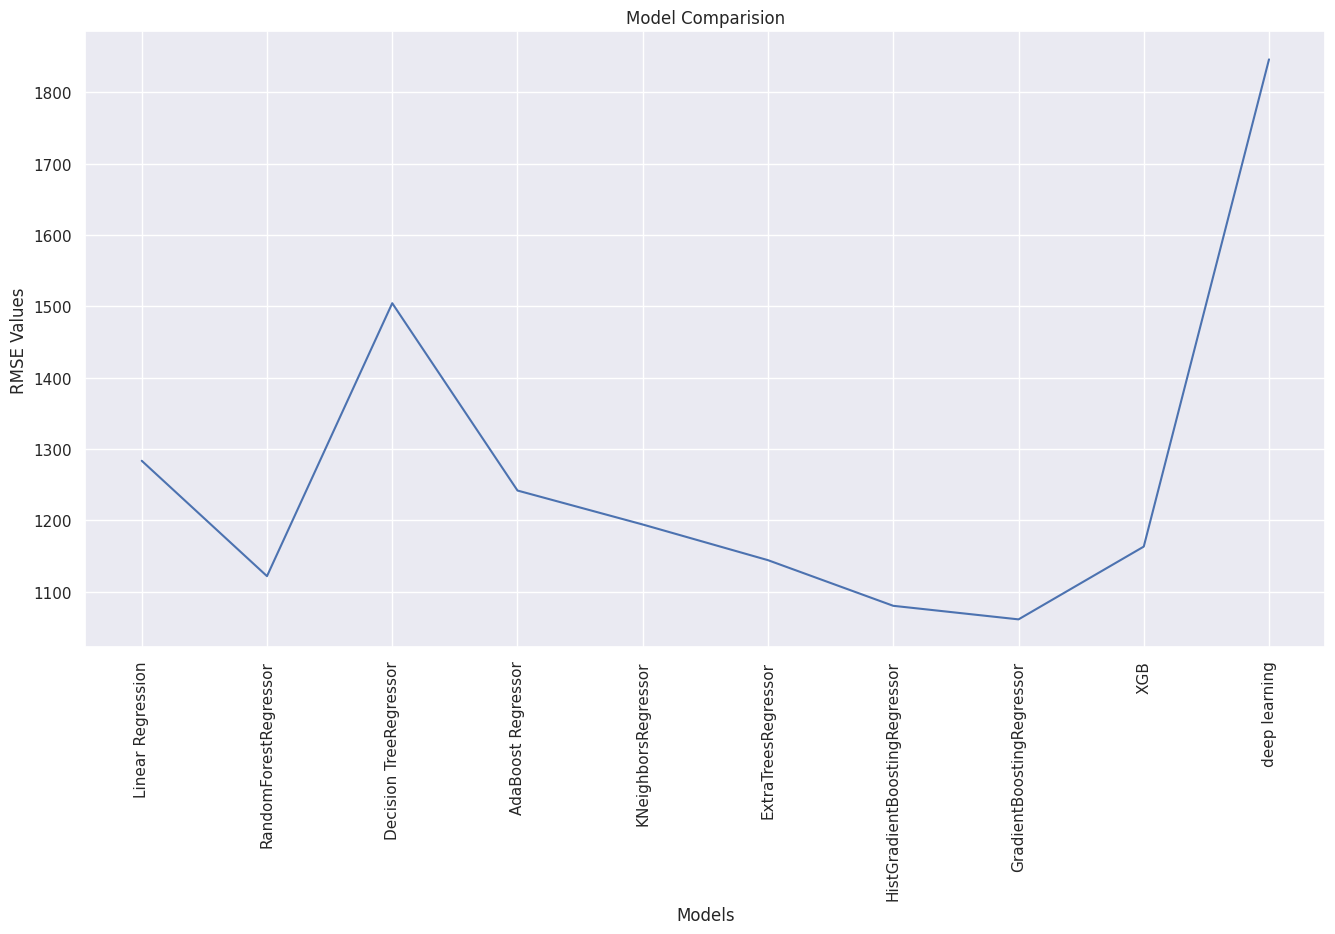

In [74]:
# plotting model comparision based on RMSE values
plt.plot(rmse_dict.keys(), rmse_dict.values())
plt.tick_params(axis='x', rotation=90)
plt.title('Model Comparision')
plt.xlabel('Models')
plt.ylabel('RMSE Values')

Gradient Boosting model performed 30% better compared to the decision tree model and 42% better compared to the deep learning model.

Next Steps:

1. Perform hyperparameter tuning and compare model performance.
2. Use different number of neurons and layers when building deep learning models.
3. Use different metric for evaluation.

